### 1. Importación de librerias

In [1]:
## Manipulación de datos
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None) # Para mostrar todas las columnas del dataframe en el notebook

## Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

## Transformaciones yeo-johnson
import scipy.stats as stats

#### Configuración #########################
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

### 2. Carga de los datos

In [2]:
# Definición ruta acceso a los datos

DATA = Path('/Users/claudiocollaobahamondes/Desktop/deploy_ml/deploy_ml/data')
#DATA = Path('./')

# Validación si existe la carpeta data
DATA.exists()

True

In [3]:
!cd /Users/claudiocollaobahamondes/Desktop/deploy_ml/deploy_ml/data;ls

data_description.txt  test.csv
sample_submission.csv train.csv


In [4]:
# Carga de los datos

test = pd.read_csv(DATA/'test.csv')
train = pd.read_csv(DATA/'train.csv')

### 3. Análisis exploratorio

### 3.1 Análisis general

In [5]:
# Dimensiones train

train.shape

(1460, 81)

In [6]:
# Tipo de datos por columna

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Eliminar columna id 

train.drop('Id', axis=1, inplace=True)

### 3.2 Análisis variable target

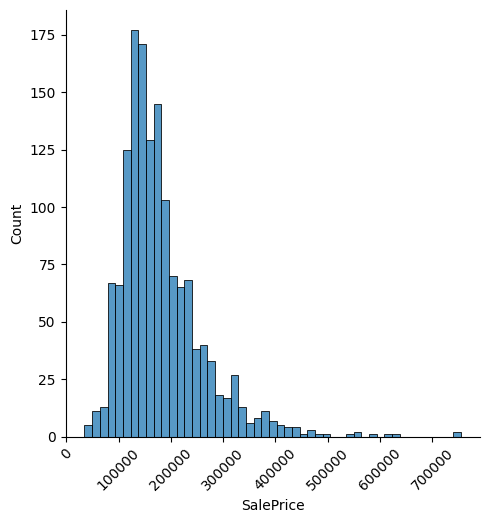

In [8]:
# La variable objetivo es el precio de venta SalesPrice

sns.displot(data=train, x="SalePrice")
plt.xticks(rotation=45)
plt.show()

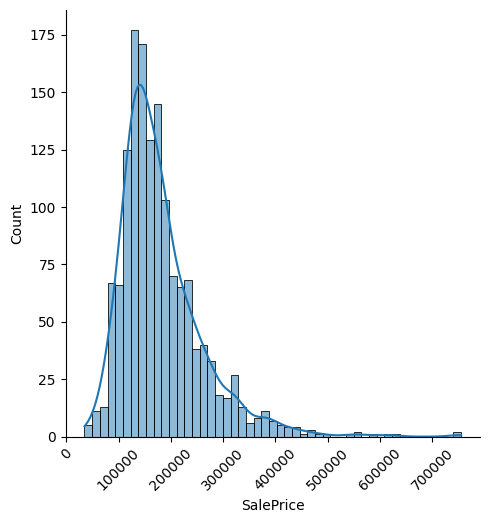

In [9]:
# La variable objetivo es el precio de venta SalesPrice

sns.displot(data=train, x="SalePrice",kde=True)
plt.xticks(rotation=45)
plt.show()

La variable target, del tipo continua, tiene una distribución hacía la derecha

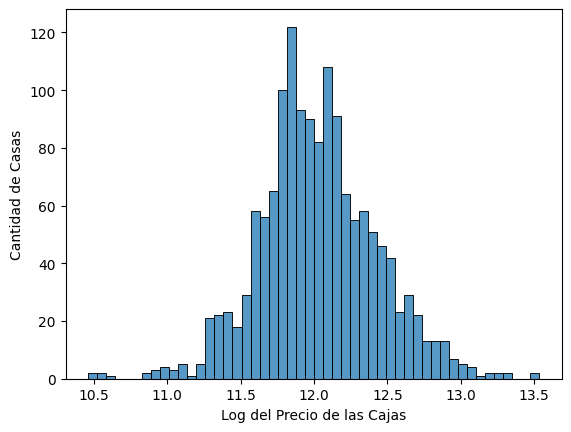

In [10]:
# Transformación de la variable target

sns.histplot(np.log(train['SalePrice']),bins=50)
plt.ylabel('Cantidad de Casas')
plt.xlabel('Log del Precio de las Cajas')
plt.show()

La distribución de la variable target transformada se acerca a un comportamiento normal

In [11]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 3.3 Identificación de variables

In [12]:
# Identificación de las variables categóricas

categorical_vars = [var for var in train.columns if train[var].dtype == 'O']

# MSSubClass es una variable categorica por definición, a pesar de sus valores numéricos
#por lo tanto se agrega a la lista de variables categóricas

categorical_vars = categorical_vars + ['MSSubClass']

In [13]:
print('La cantidad de variables categóricas es',len(categorical_vars))

La cantidad de variables categóricas es 44


In [14]:
# Identificación de las variables númericas

numericas_var = [var for var in train.columns if train[var].dtype != 'O']

In [15]:
# Se elimina la variable objetivo y la variable numérica identificada como categórica

numericas_var.remove('MSSubClass')
numericas_var.remove('SalePrice')

### 3.4 Identificación de datos perdidos

In [16]:
# Identificar columnas con datos perdidos

vars_con_na = [var for var in train.columns if train[var].isnull().sum() > 0]

#Determinar el porcentaje de datos perdidos por columna y ordenarlo por orden ascendente

train[vars_con_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [17]:
# Generación de dataframe de datos perdidos

Datos_perdidos = pd.DataFrame(data=train[vars_con_na].isnull().mean().sort_values(ascending=False)).reset_index()
Datos_perdidos = Datos_perdidos.rename({'index':'Columnas',0:'Porcentaje'},axis=1)

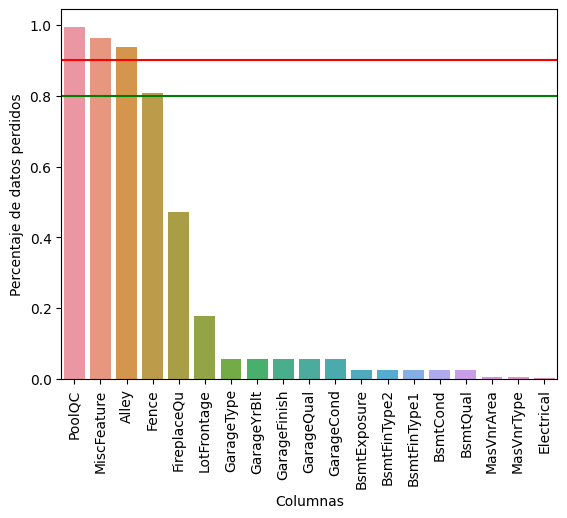

In [18]:
# Graficar proporción de datos perdidos

sns.barplot(data=Datos_perdidos, x="Columnas", y="Porcentaje")
plt.ylabel('Percentaje de datos perdidos')
plt.xticks(rotation=90)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [19]:
# Determinar de las variables con datos perdidos cuales son numéricas y cuales categóricas

cat_na = [var for var in categorical_vars if var in vars_con_na]
num_na = [var for var in numericas_var if var in vars_con_na]

print('Número de variables categóricas con datos perdidos: ', len(cat_na))
print('Número de variables numéricas con datos perdidos: ', len(num_na))

Número de variables categóricas con datos perdidos:  16
Número de variables numéricas con datos perdidos:  3


In [20]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [21]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### 3.5 Relación entre datos perdidos y variable objetivo 

In [22]:
# Evaluemos el precio de la casa en aquellas observaciones donde falta la información. 
#Haremos esto para cada variable que muestre datos faltantes.

def analyse_na_value(df, var):
    
    """
    Función con el objetivo de gráficar la relación entre las variables con datos
    perdidos y la variable objetivo.
    
    df = Dataframe a ser analizado
    var = variables con datos faltantes
    
    """
    df = df.copy()
    
    # Se crea una variable que indique si la variable tiene datos perdidos
    # 1: si , 0:no

    df[var] = np.where(df[var].isnull(), 1, 0)

    # Comparemos el promedio de SalePrice en las observaciones donde faltan datos
    # vs las observaciones donde los datos están disponibles

    # determinar el precio medio en los grupos 1 y 0,
    # y la desviación estándar del precio de venta,
    # y capturamos los resultados en un conjunto de datos temporal
    
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std']).reset_index()

    # Se gráfica en un gráfico de barras
    
    sns.set_color_codes("pastel")
    sns.barplot(x='mean', y=var,data=tmp, orient='h')
    
    plt.show()

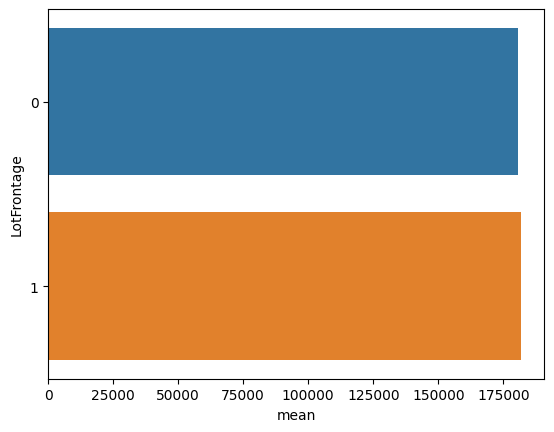

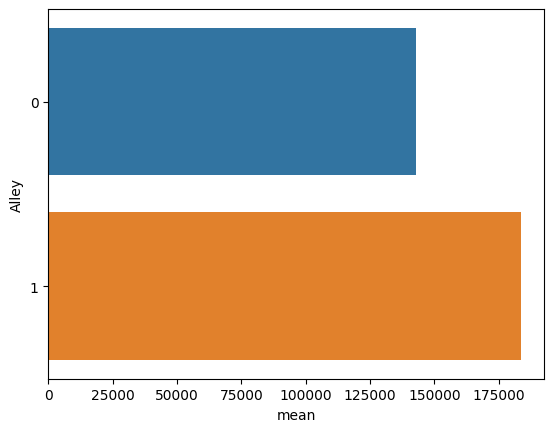

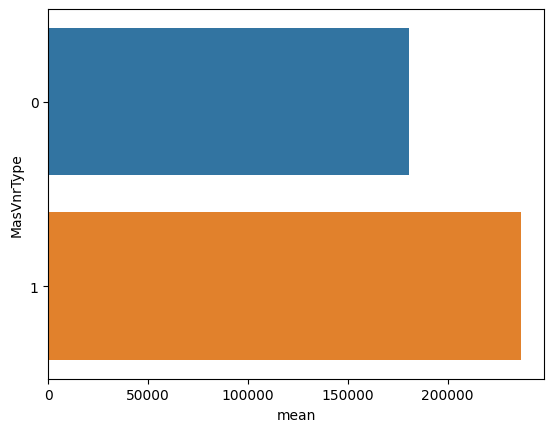

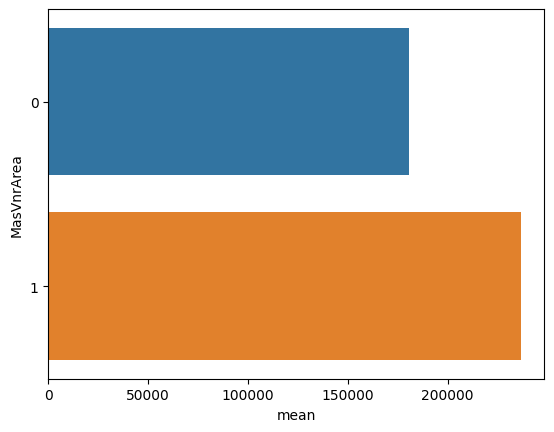

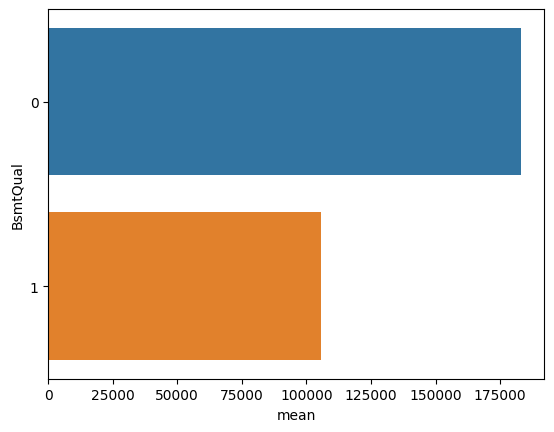

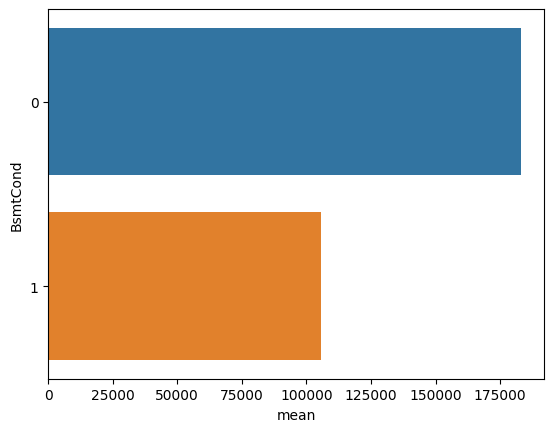

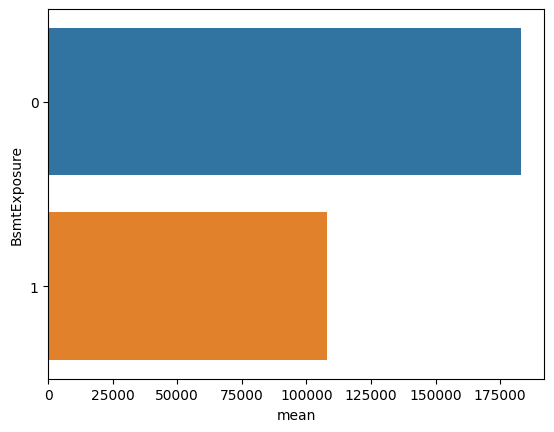

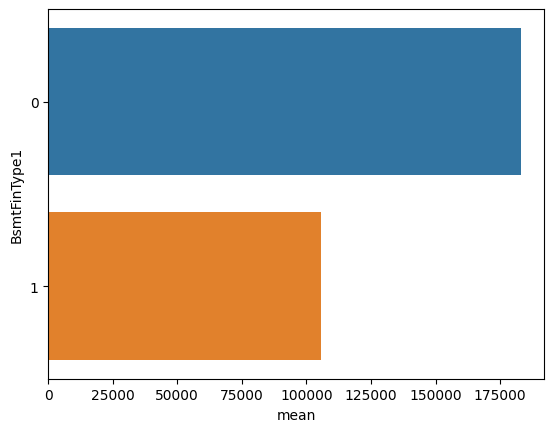

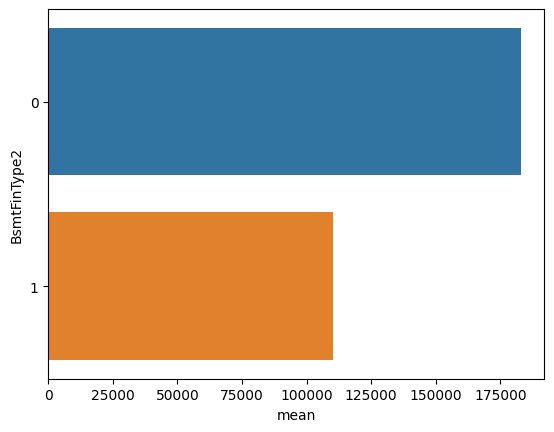

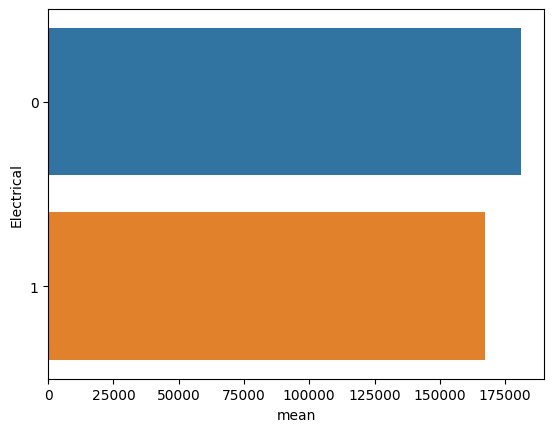

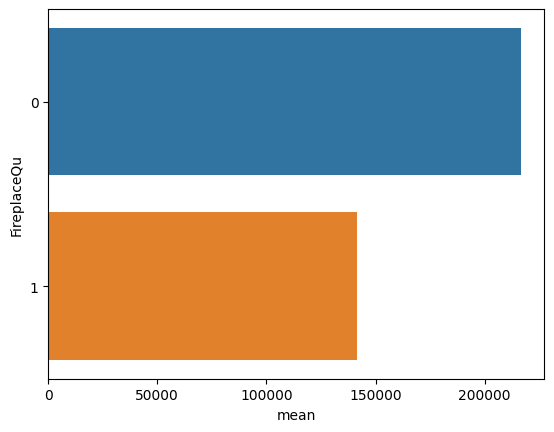

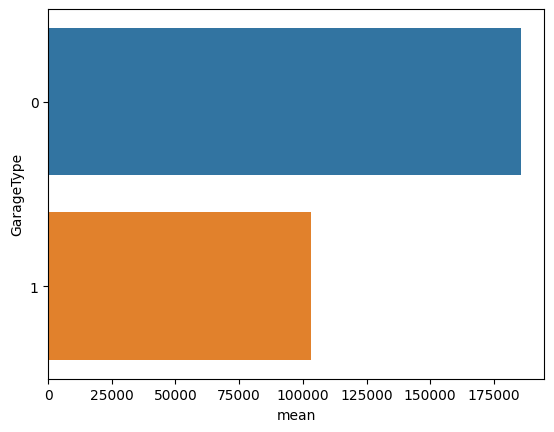

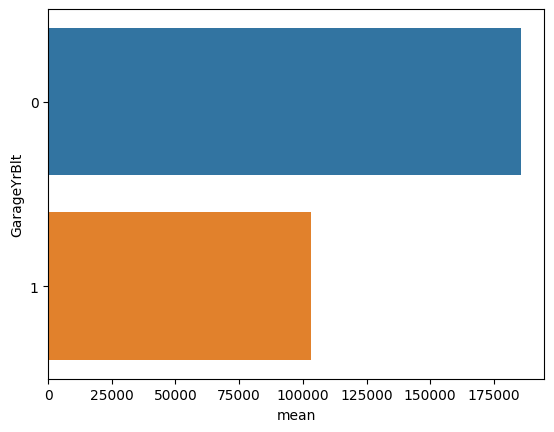

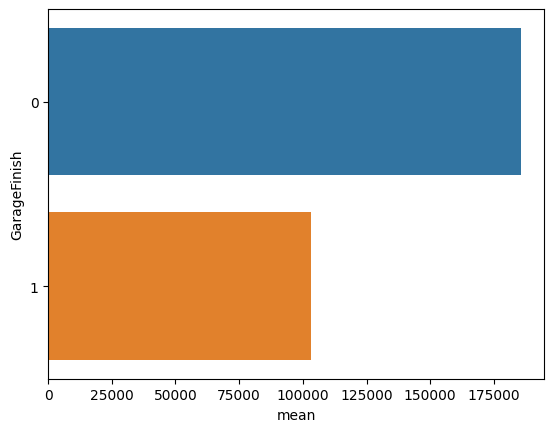

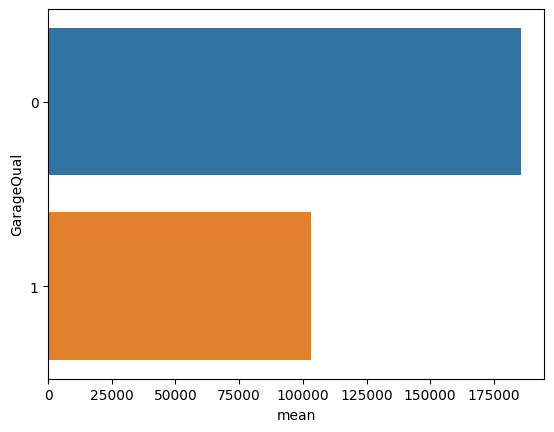

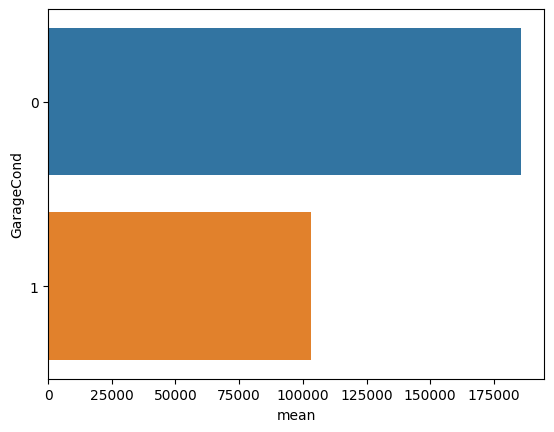

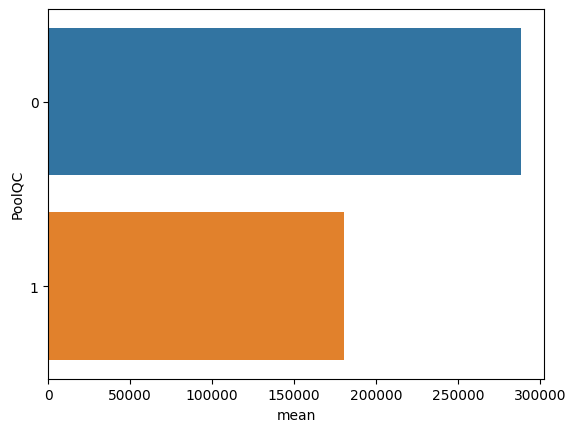

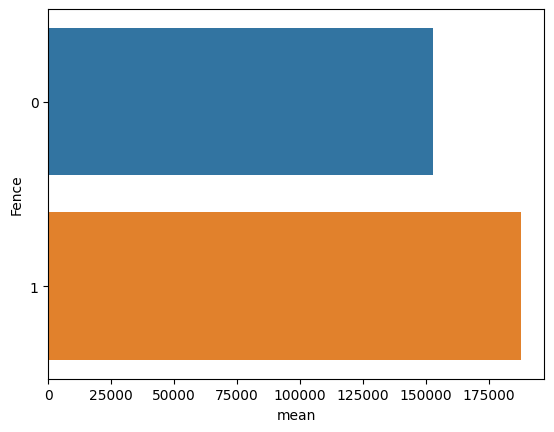

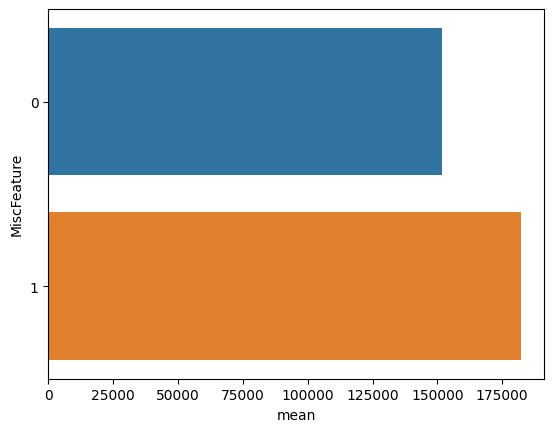

In [23]:
for var in vars_con_na:
    analyse_na_value(train, var)

En la mayoria de los casos, el precio promedio de las casas con datos perdidos difiere del precio promedio de las casas sin datos perdidos. Esto sugiere que la falta de datos podría ser un buen predictor del precio de venta.

### 3.6 Análisis variables numéricas

In [24]:
print('Number of numerical variables: ', len(numericas_var))

# visualise the numerical variables
train[numericas_var].head()

Number of numerical variables:  35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

### 3.7 Variables temporales

In [25]:
# Lista de variables que contienen año en el nombre

year_vars = [var for var in numericas_var if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
# Visualización de los años únicos por variable

for var in year_vars:
    print(var, train[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

### 3.8 Evolución del precio por año

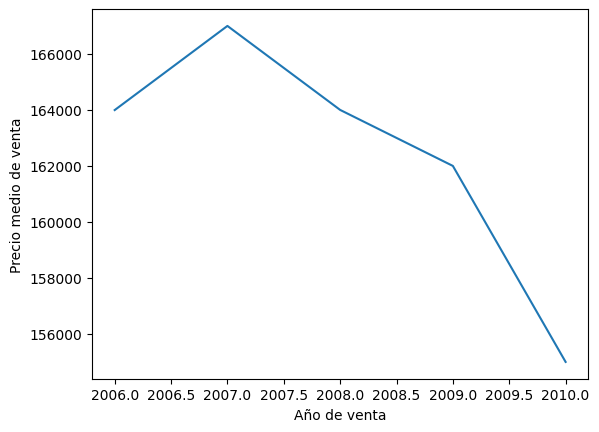

In [27]:
# Graficar el precio de venta promedio por año cuando fue vendida

ventas = train.groupby('YrSold')['SalePrice'].median().reset_index()

sns.lineplot(data=ventas, x='YrSold', y='SalePrice')
plt.ylabel('Precio medio de venta')
plt.xlabel('Año de venta')
plt.show()

El precio de venta promedio disminuye a lo largo del tiempo. Lo usual es que esto sea lo contrario, es decir que el precio de las casas aumenten su precio de venta promedio a lo largo del tiempo. 

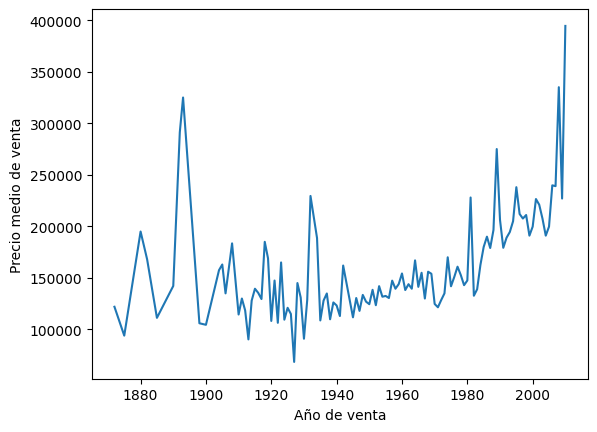

In [28]:
# Graficar el precio de venta promedio por año cuando fue vendida

ventas_construccion = train.groupby('YearBuilt')['SalePrice'].median().reset_index()

sns.lineplot(data=ventas_construccion, x='YearBuilt', y='SalePrice')
plt.ylabel('Precio medio de venta')
plt.xlabel('Año de venta')
plt.show()

El precio promedio de venta aumenta en la medida que la casa es más nueva. Es decir la casas nuevas tienden a ser más caras.

In [29]:
# Analizar la diferencia entre el año de venta y el año de construcción 

def diferencia_construccion_venta(df, var):
    """
    Función que calcula la diferencia entre el año de venta y 
    el año de construcción, año de remodelación y año de construcción
    de garaje y se grafica esta diferencia con el año de venta.
    
    """
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

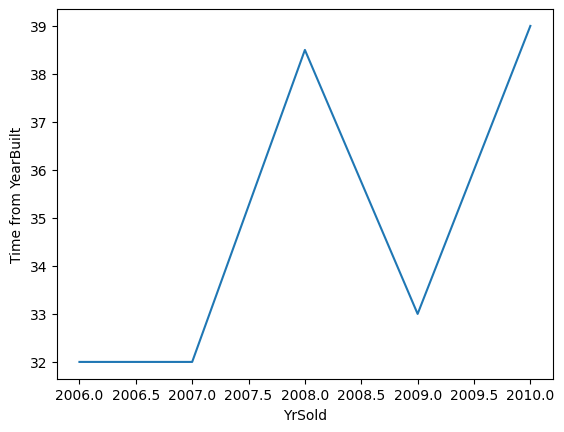

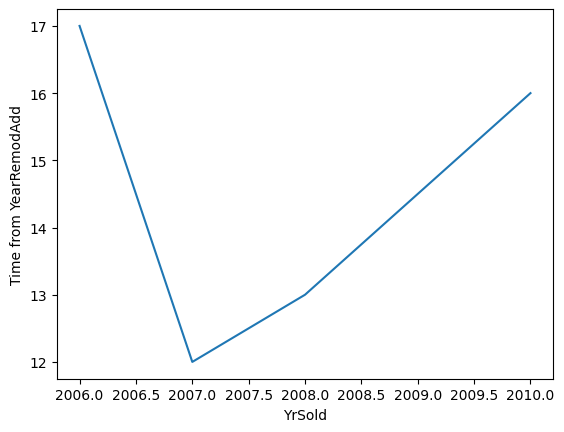

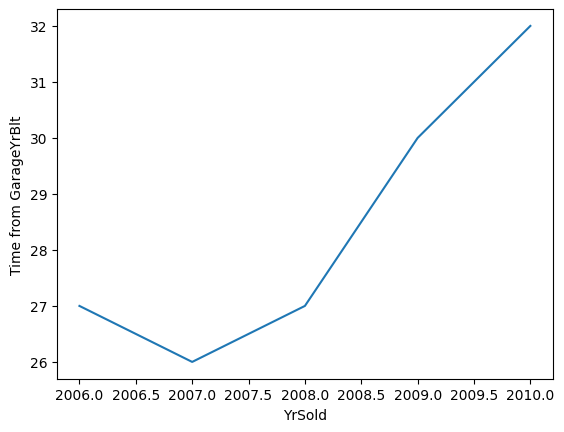

In [30]:
for var in year_vars:
    if var !='YrSold':
        diferencia_construccion_venta(train, var)

De los gráficos, vemos que hacia 2010, las casas vendidas tenían garajes más antiguos y no habían sido remodeladas recientemente, eso podría explicar por qué vemos precios de venta más bajos en los últimos años, al menos en este conjunto de datos.

Ahora podemos trazar en su lugar el tiempo desde la última remodelación, o el tiempo desde que se construyó, y el precio de venta, para ver si existe una relación.

In [31]:
def analyse_year_vars(df, var):
    """
    Captura la diferencia entre la variable año
    y el año en que esta fue vendida.
    """
    
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

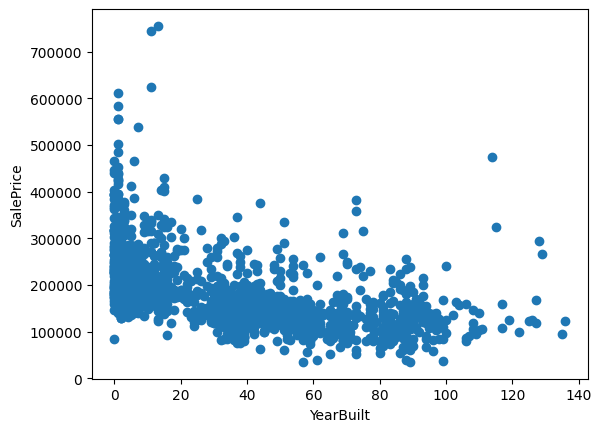

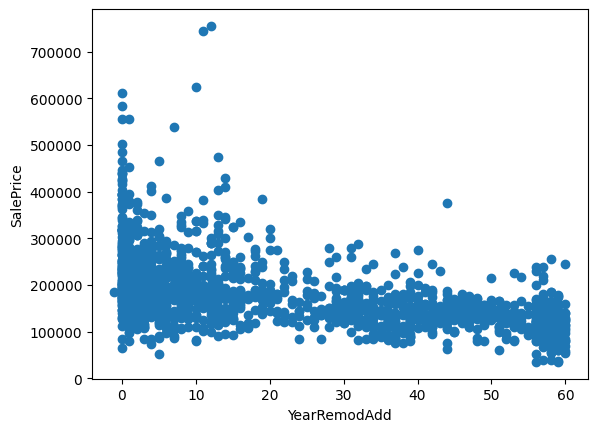

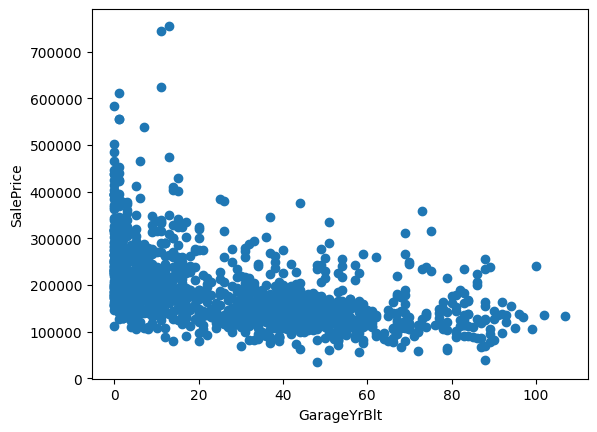

In [32]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(train, var)

Vemos que hay una tendencia a la bajada de precio, con casas más antiguas. En otras palabras, cuanto mayor sea el tiempo entre la construcción o remodelación de la casa y la fecha de venta, menor será el precio de venta.

Lo cual tiene sentido, porque esto significa que la casa tendrá un aspecto más antiguo y posiblemente necesite reparaciones.

Esto es interesante, entendiendo que el valor de una propiedad debiera incrementarse en el tiempo.

### 3.9 Análisis de variables discretas

Se entiende por variables discretas aquellas que tienen un número finito de valores numéricos o alfanuméricos

In [33]:
# Se entiende como variables discretas aquellas que tienen menos de 20 valores únicos

discrete_vars = [var for var in numericas_var if len(train[var].unique()) < 20 and var not in year_vars]


print('Numero de variables discretas: ', len(discrete_vars))

Numero de variables discretas:  13


In [34]:
# Se visualizan las variables discretas

train[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

Estas variables discretas suelen ser calificaciones (Qual) o escalas de calificación (Cond), o se refieren al número de habitaciones o unidades (FullBath, GarageCars), o indican el área de la habitación (KitchenAbvGr).

Esperamos precios más altos, con números más grandes.

Avancemos y analicemos su contribución al precio de la vivienda.

MoSold es el mes en que se vendió la casa.

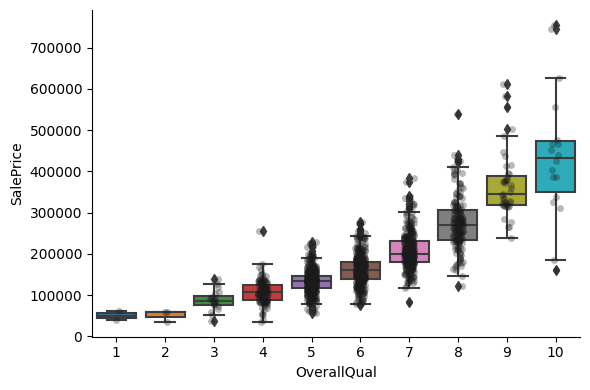

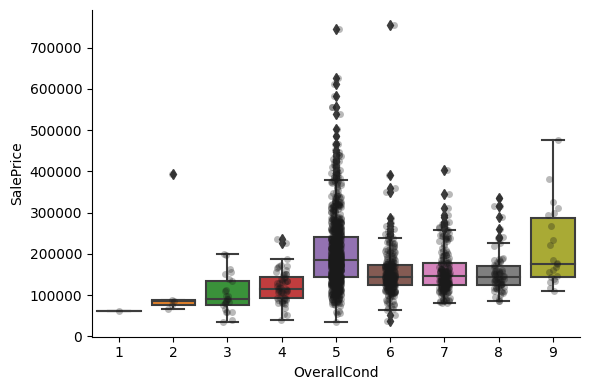

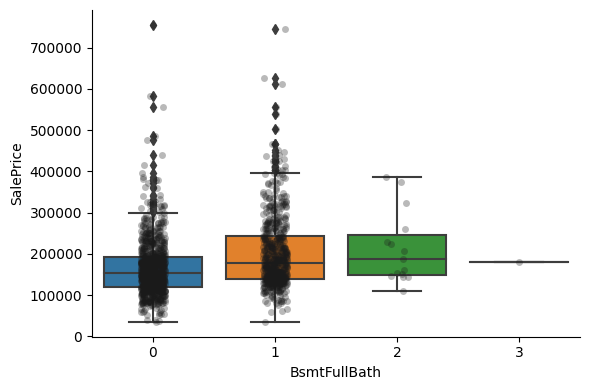

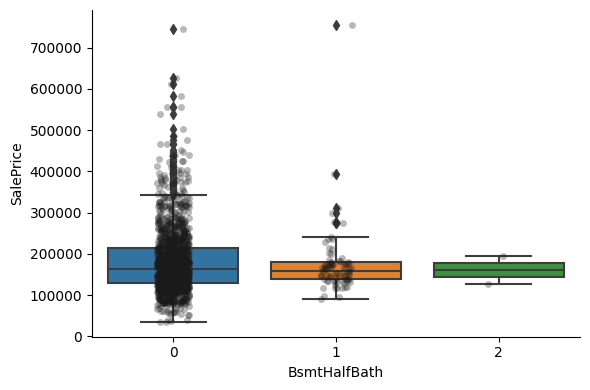

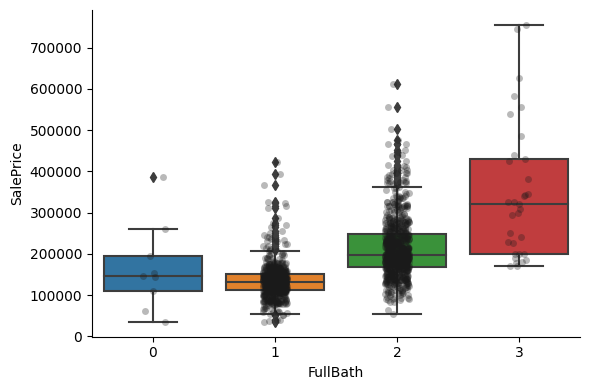

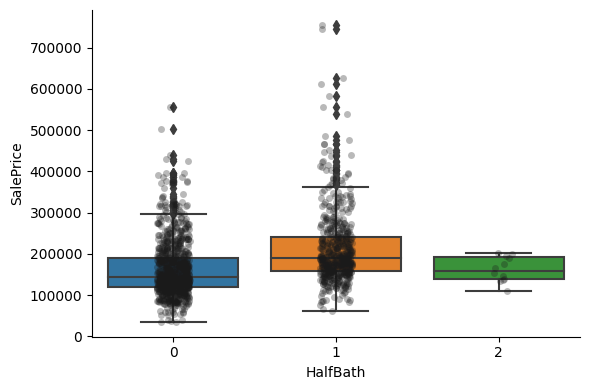

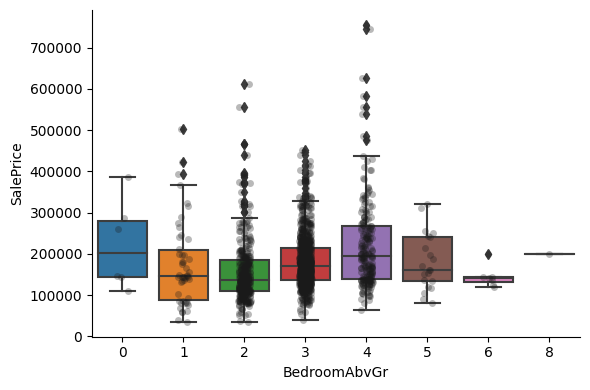

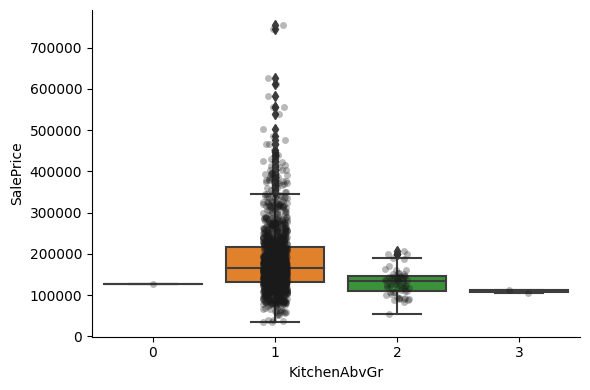

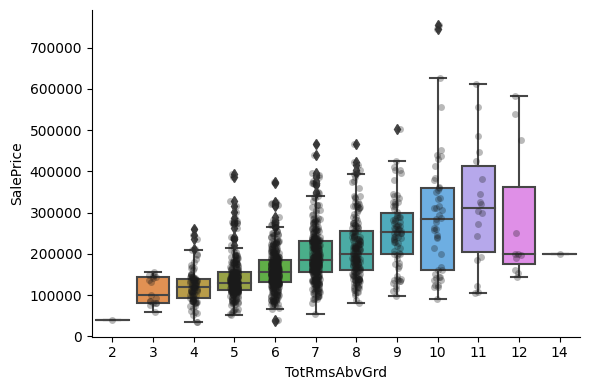

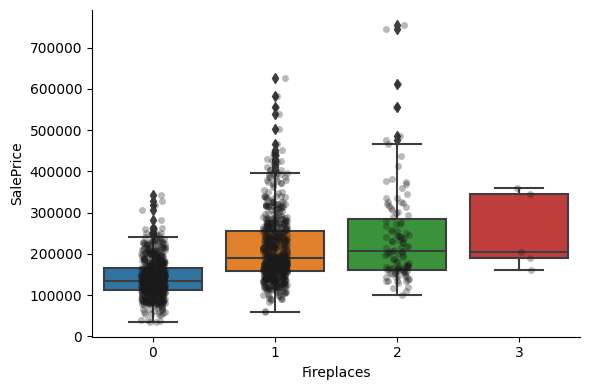

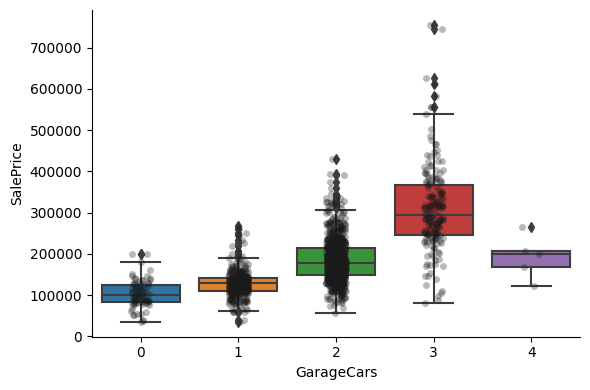

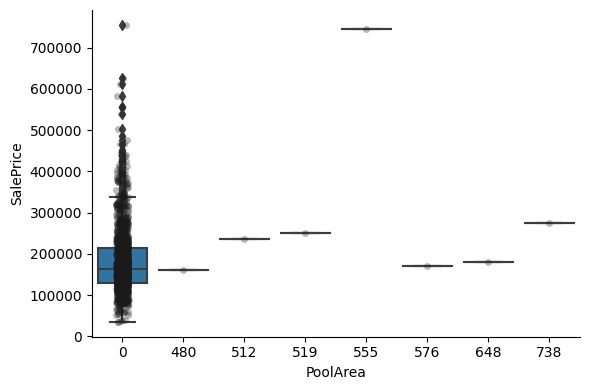

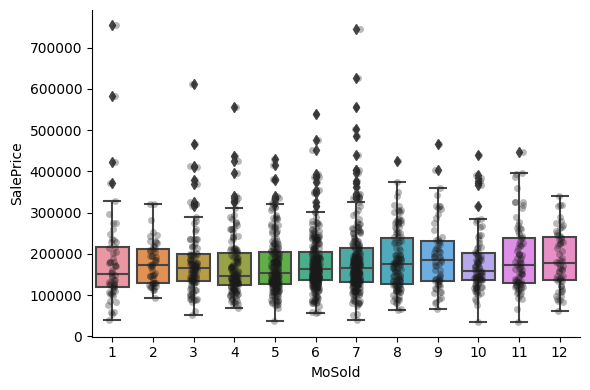

In [35]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=train, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Para la mayoría de las variables numéricas discretas, vemos un aumento en el precio de venta, con la calidad, o el estado general, o el número de habitaciones, o la superficie.

Para algunas variables, no vemos esta tendencia. Lo más probable es que esa variable no sea un buen predictor del precio de venta.

### 3.10 Variables continuas

Avancemos y encontremos la distribución de las variables continuas. Consideraremos variables continuas a todas aquellas que no son temporales ni discretas.

In [36]:
# Generar una lista de las variables continuas
cont_vars = [var for var in numericas_var if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [37]:
# visualización de variables continuas

train[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

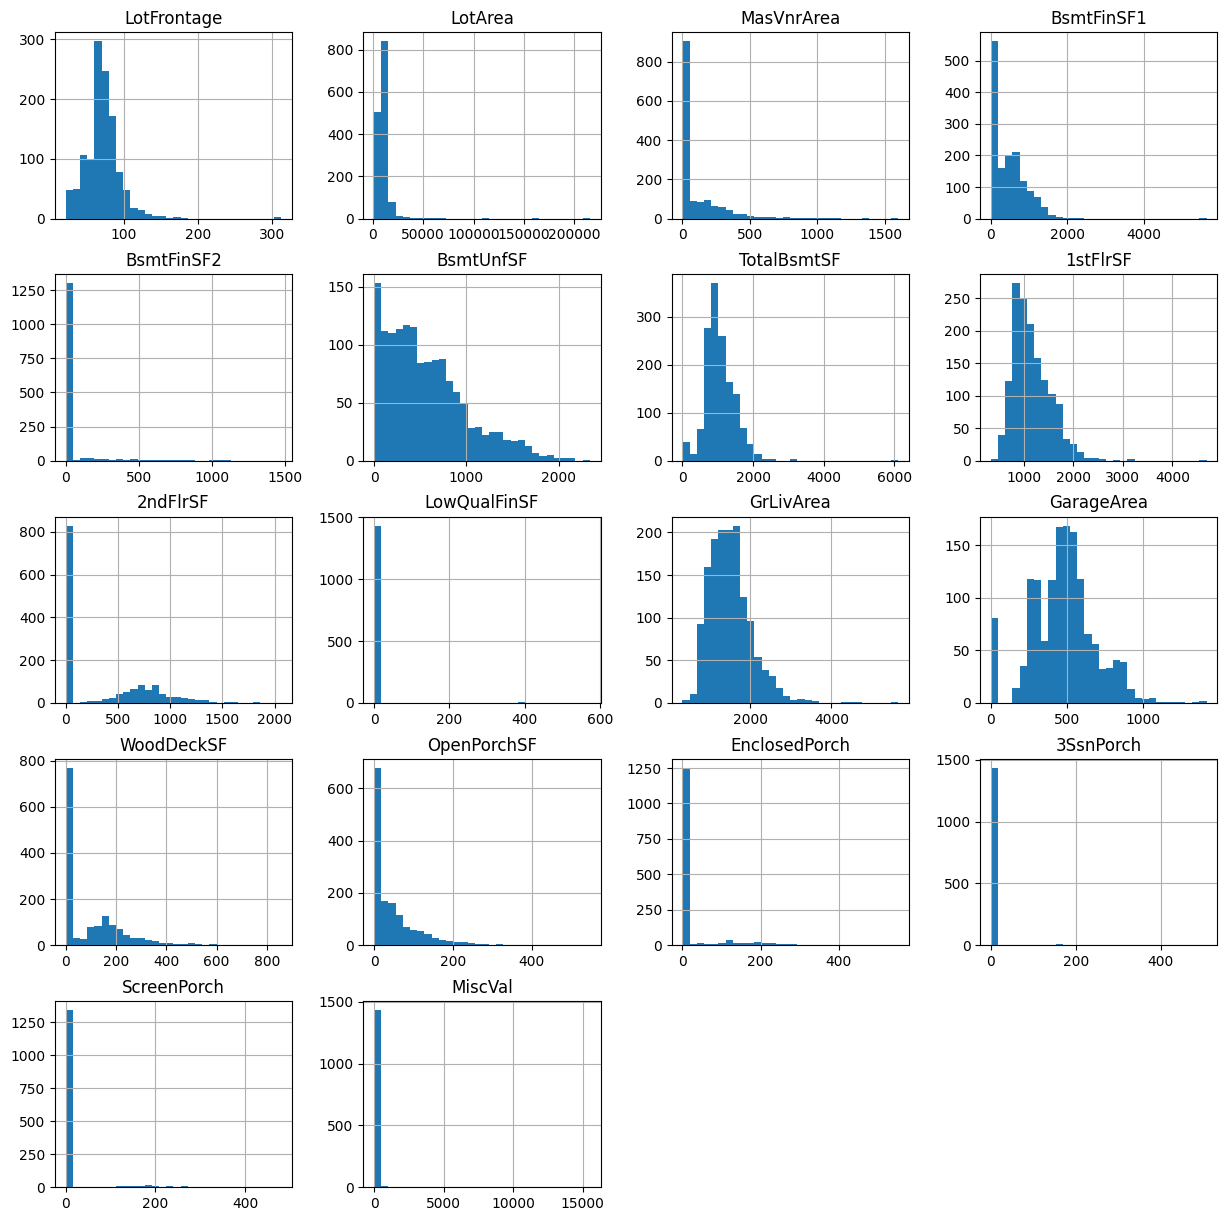

In [38]:
# Graficar todas las variables continuas
train[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Las variables no se distribuyen normalmente. Y hay unos pocos en particular que son extremadamente sesgados como 3SsnPorch, ScreenPorch y MiscVal.

A veces, la transformación de las variables para mejorar la distribución del valor mejora el rendimiento del modelo. Pero es poco probable que una transformación ayude a cambiar drásticamente la distribución de las variables supersesgadas.

Podemos aplicar una transformación de Yeo-Johnson a variables como LotFrontage, LotArea, BsmUnfSF y una transformación binaria a variables como 3SsnPorch, ScreenPorch y MiscVal.

Sigamos adelante y hagamos eso.

In [39]:
# Generación de listado de variables más sesgada a ser tratadas

sesgadas_var = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

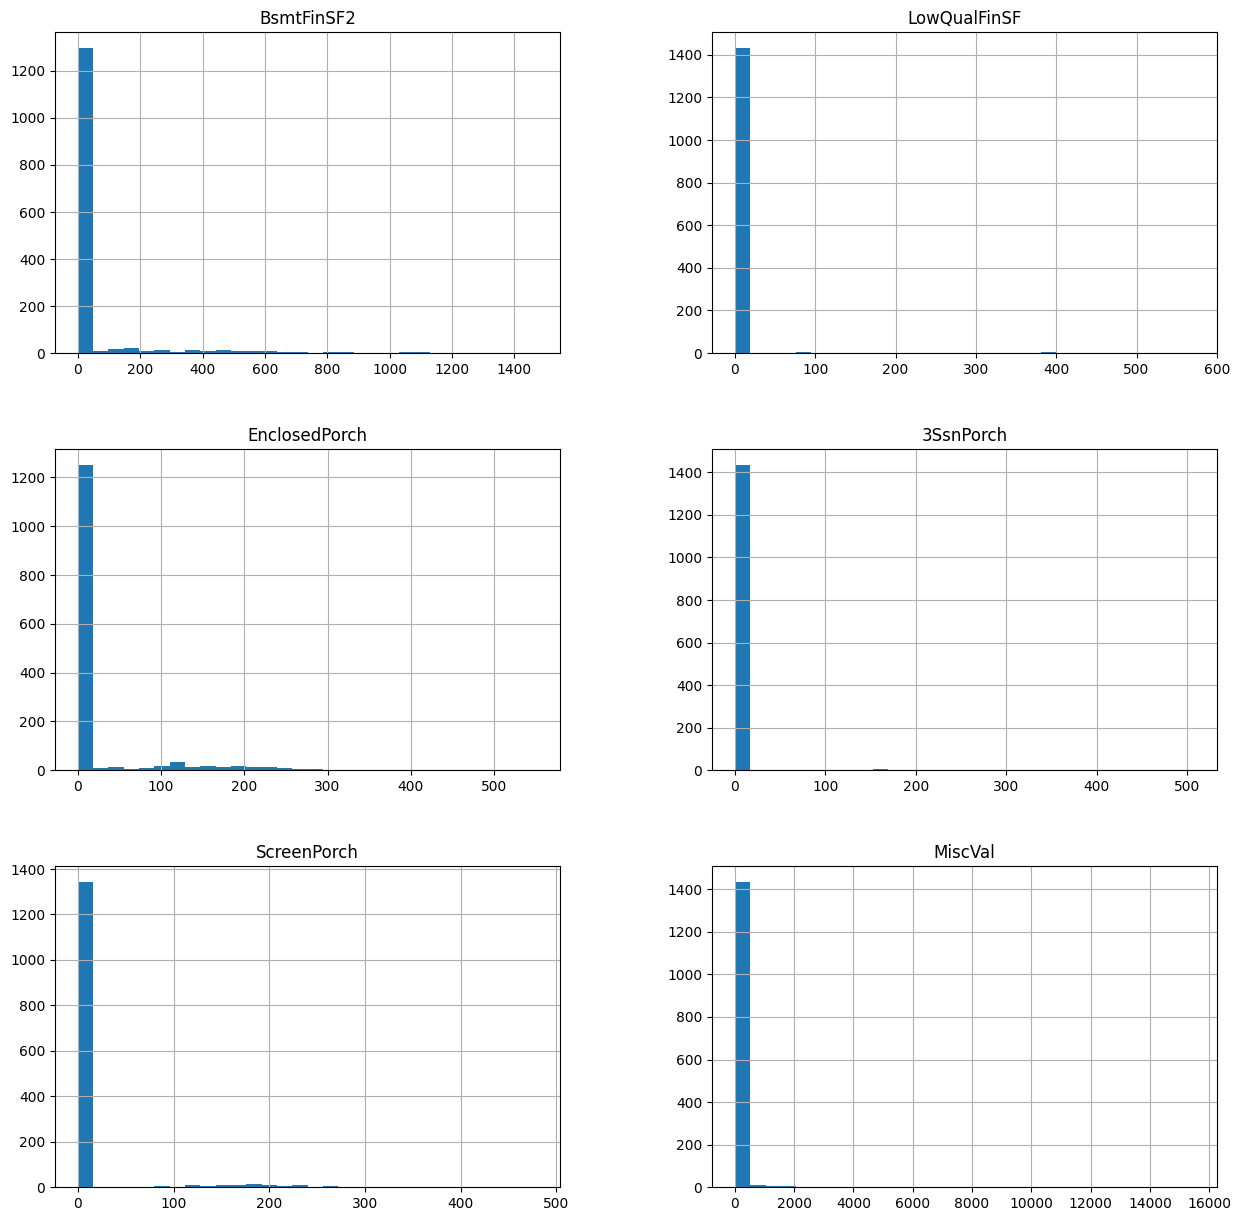

In [40]:
# Graficar las variables más sesgadas
train[sesgadas_var].hist(bins=30, figsize=(15,15))
plt.show()

In [41]:
# Generación de las restantes variables continuas

continuas_var = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

### 3.10.1 Transformación variables continuas

La transformación Yeo-Johnson transformar una variable continua (numérica) para que la variable resultante se vea más normalmente distribuida. A menudo se utilizan en la ingeniería de características para reducir el sesgo en las variables sin procesar.

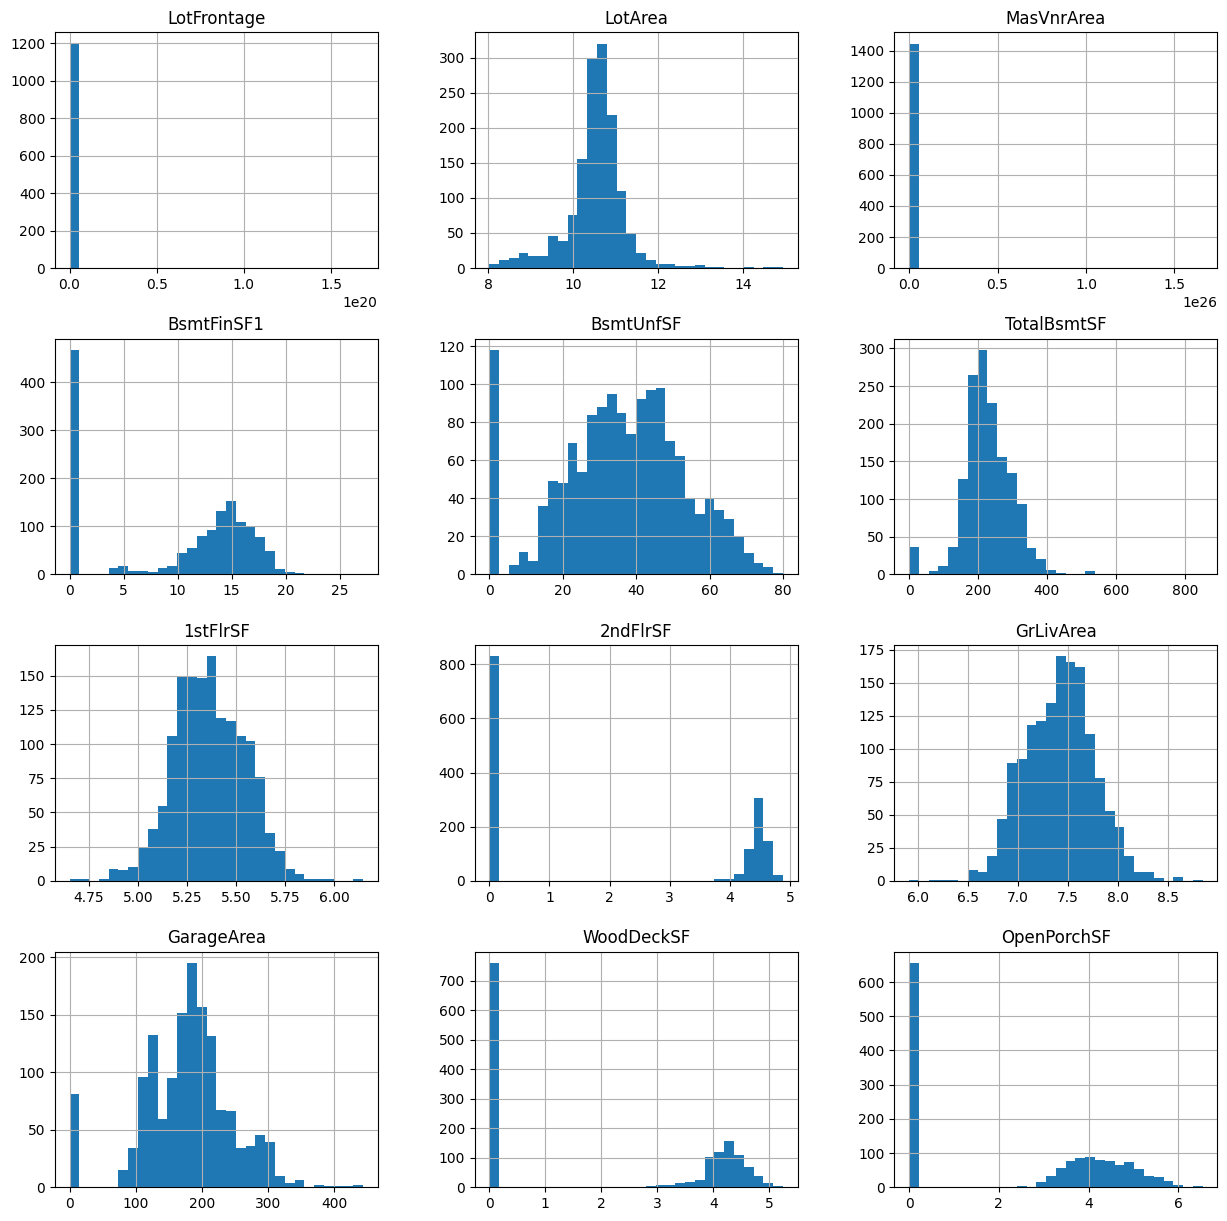

In [42]:
# Análisis de uso de la transformación Yeo-Johnson

# Creación de data temporal
tmp = train.copy()

for var in continuas_var:
    tmp[var], param = stats.yeojohnson(train[var])

tmp[continuas_var].hist(bins=30, figsize=(15,15))
plt.show()

Para LotFrontage y MasVnrArea, la transformación no hizo un trabajo sorprendente.

Para los demás, los valores parecen distribuirse más uniformemente en el rango.

Queda por ver si esto ayuda a mejorar el poder predictivo. Para determinar si este es el caso, debemos entrenar un modelo con los valores originales y otro con los valores transformados, y determinar el rendimiento del modelo y la importancia de las características.

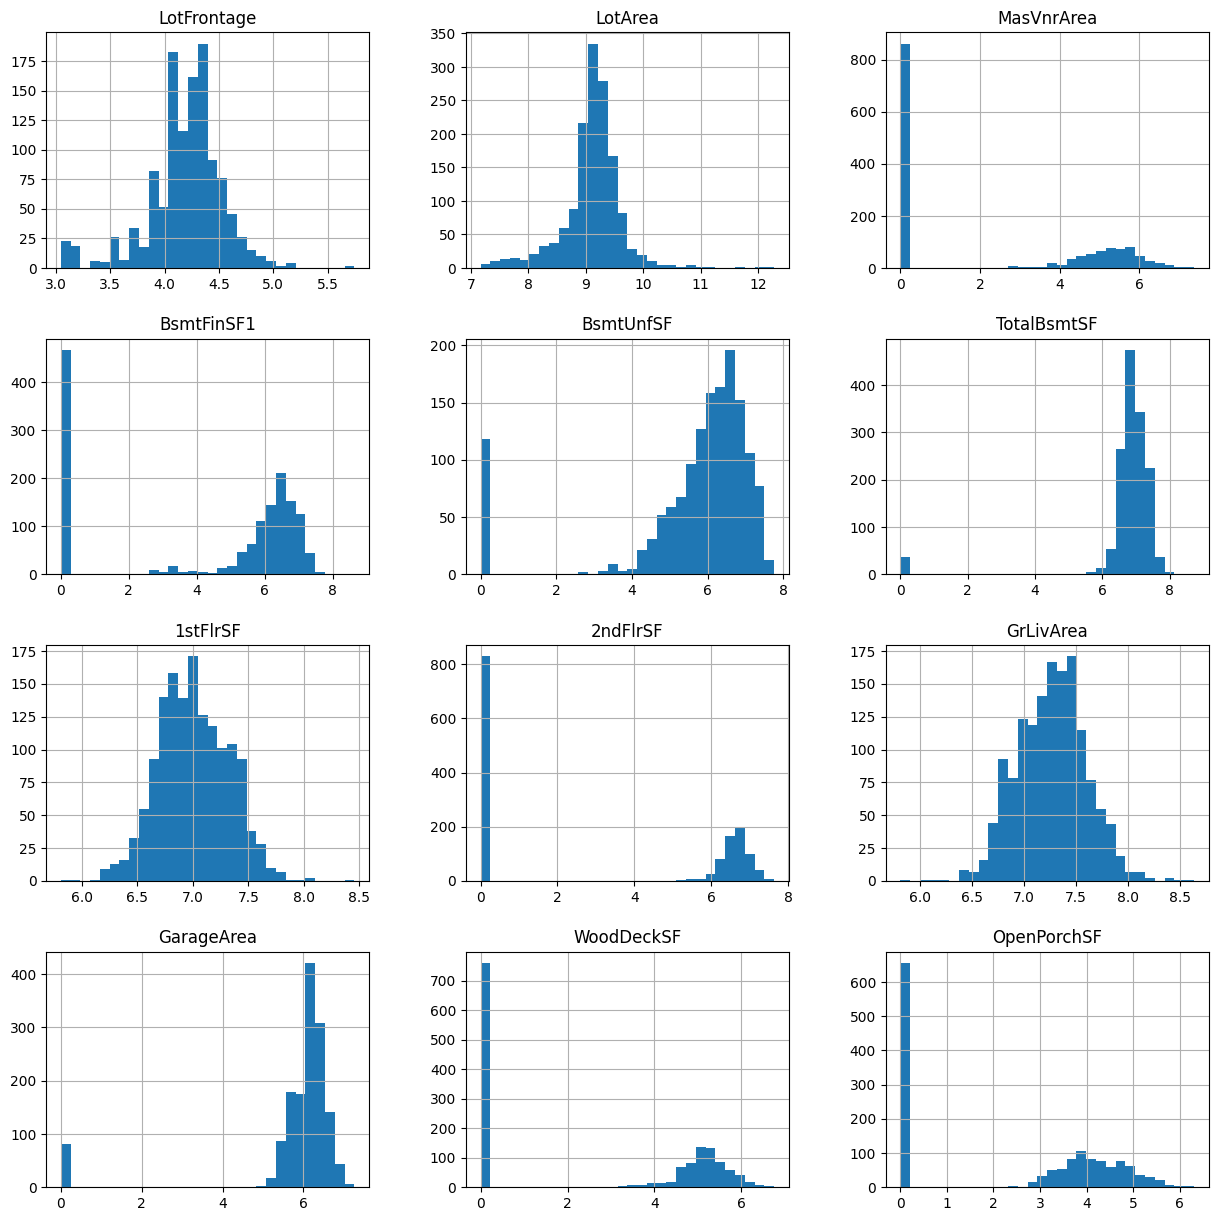

In [43]:
# Análisis de uso de la transformación Log

# Creación de data temporal
tmp_log = train.copy()

for var in continuas_var:
    tmp_log[var] = np.log(train[var])

tmp_log = tmp_log.replace([np.inf, -np.inf], 0)  

tmp_log[continuas_var].hist(bins=30, figsize=(15,15))
plt.show()

Utilizando Log mejora la transformación de LotFrontage y MasVnrArea, pero como se reemplazan los inf y los -inf por ceros esto pueden empeorar el sesgo.

Se realiza un análisis visual graficando las variables originales o transformadas vs la variable objetivo para ver si hay una relación

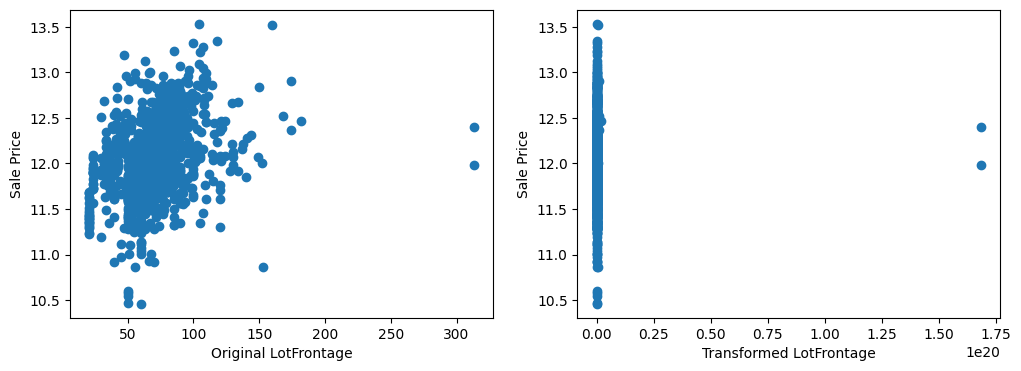

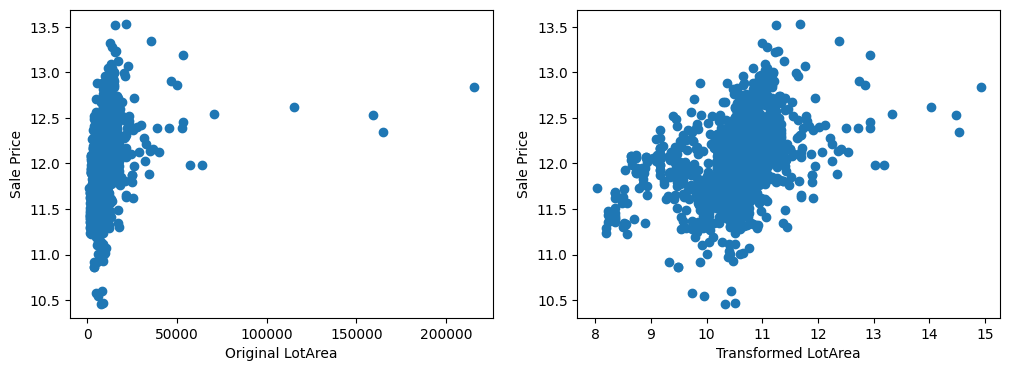

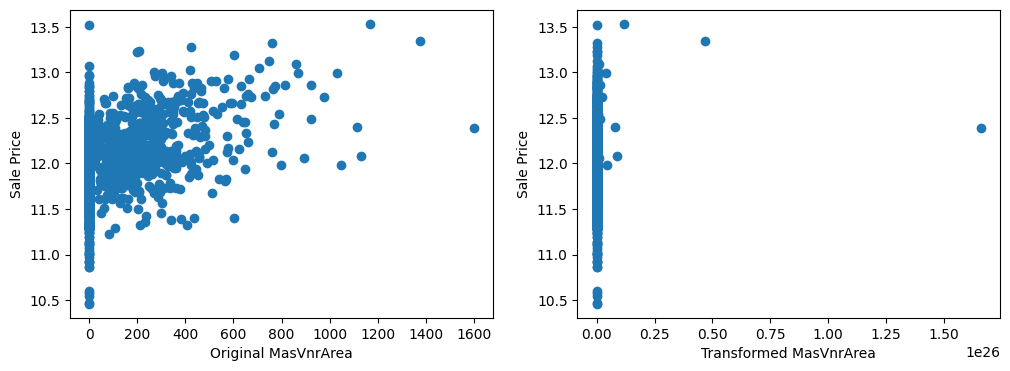

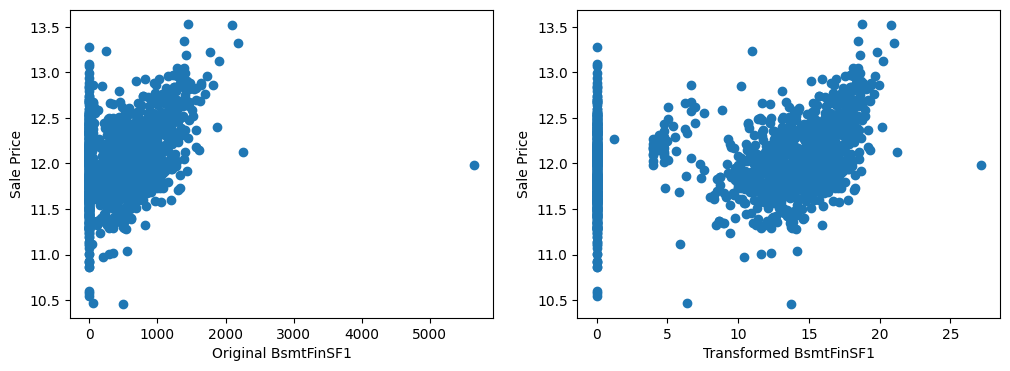

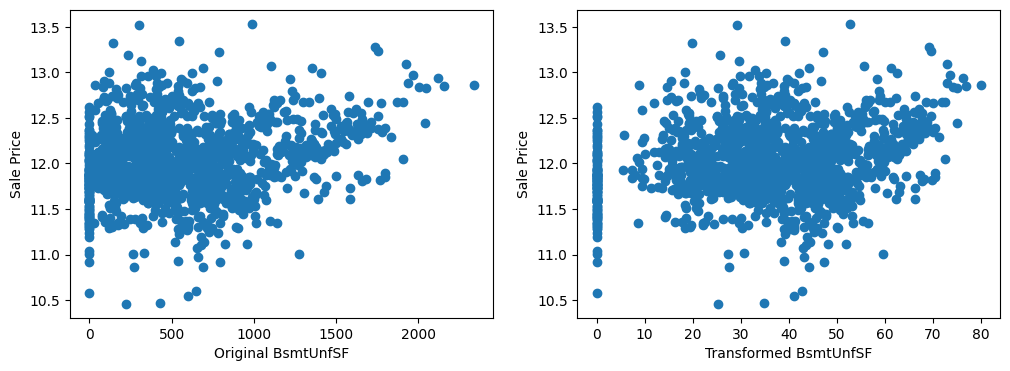

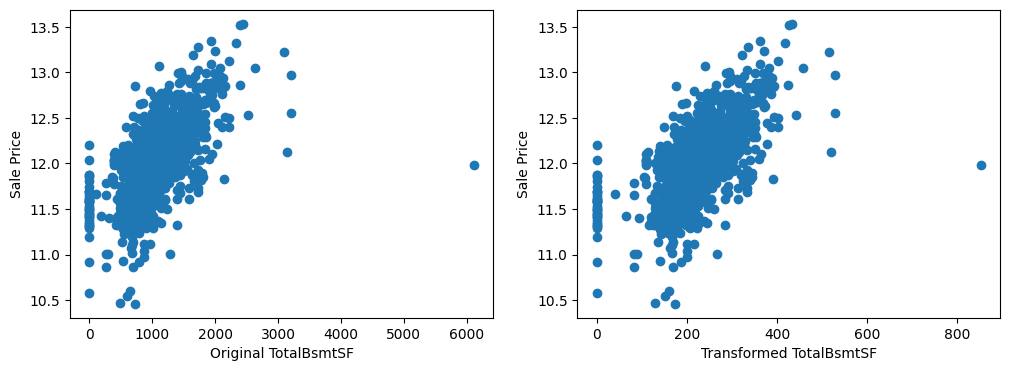

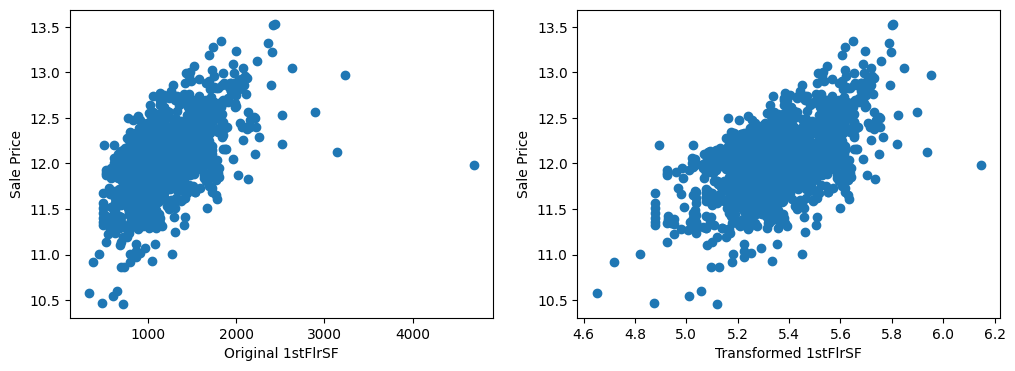

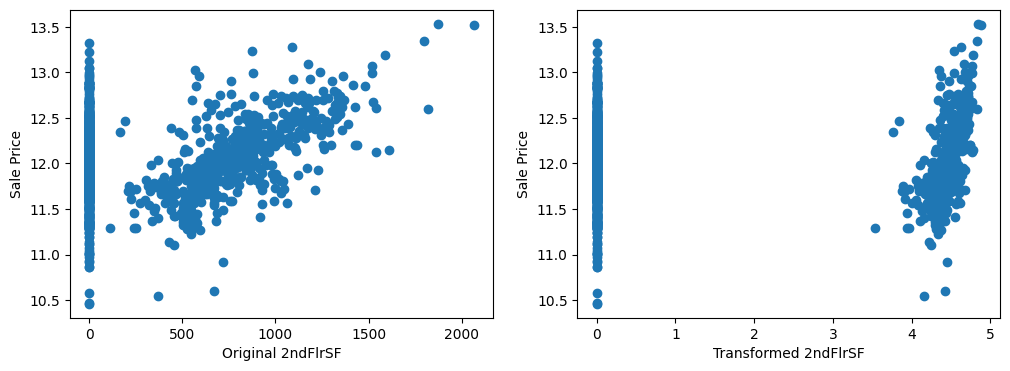

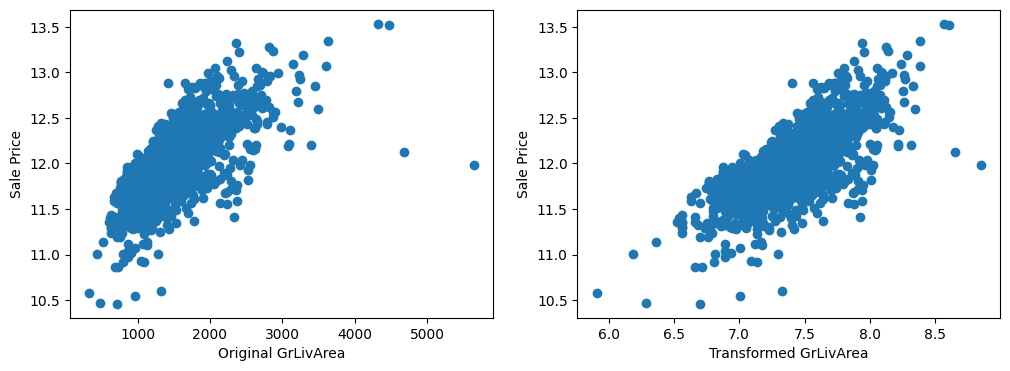

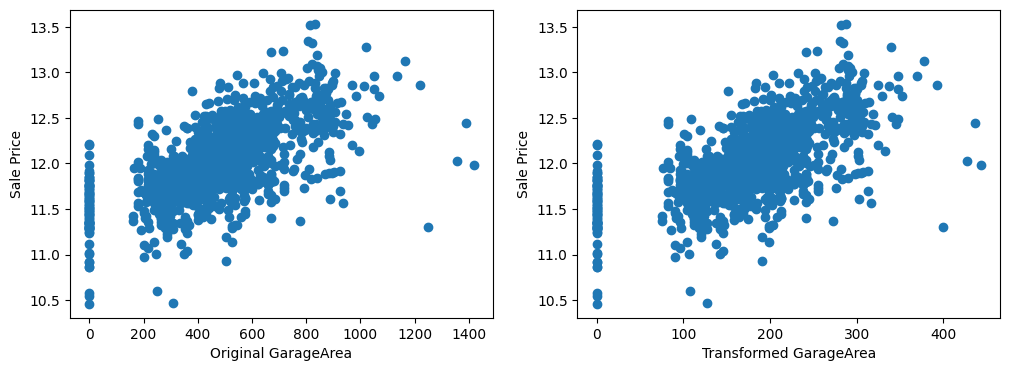

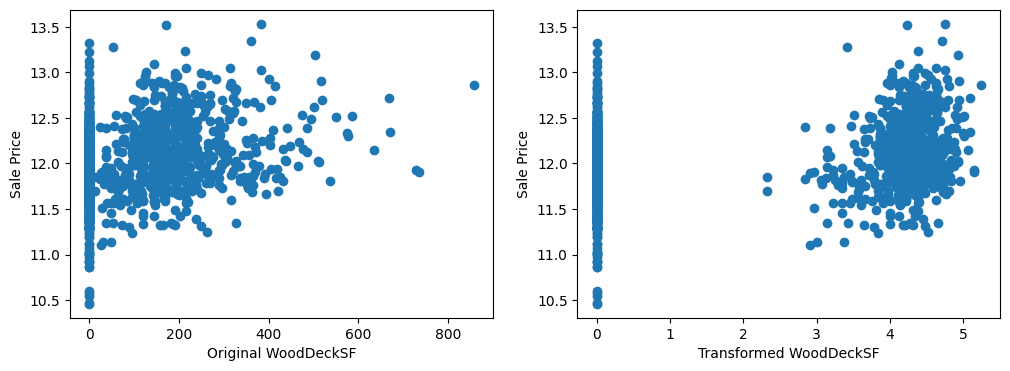

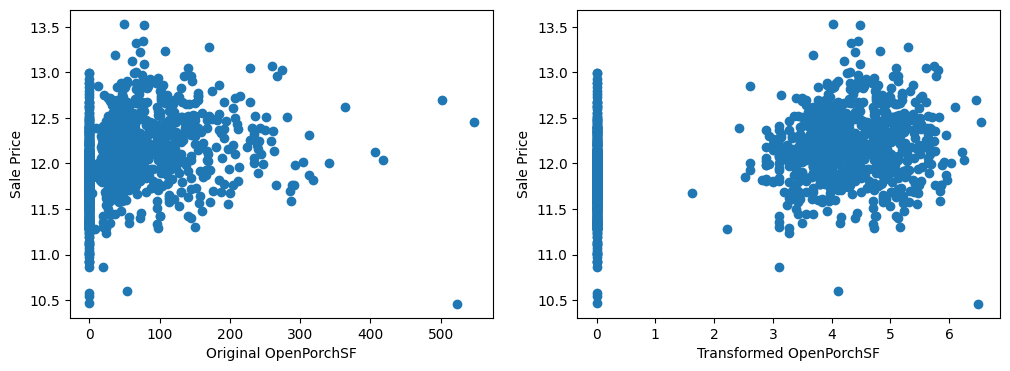

In [44]:
for var in continuas_var:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(train[var], np.log(train['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

A simple vista, las transformaciones parecen mejorar la relación solo para LotArea.

Probemos una transformación diferente ahora. La mayoría de las variables contienen el valor 0 y, por lo tanto, no podemos aplicar la transformación logarítmica, pero ciertamente podemos hacerlo para las siguientes variables:

  ["LotFrontage", "1stFlrSF", "GrLivArea"]
 
  Así que hagamos eso y veamos si eso cambia la distribución variable y su relación con el objetivo.

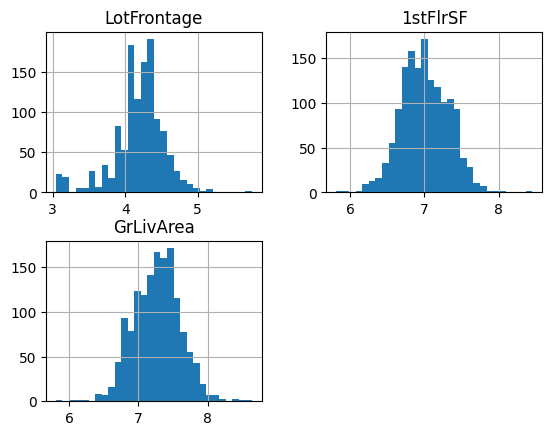

In [45]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = train.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(train[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

La distribución de las variables después de la transformación presentan un comportamiento más cercano al gausiano.


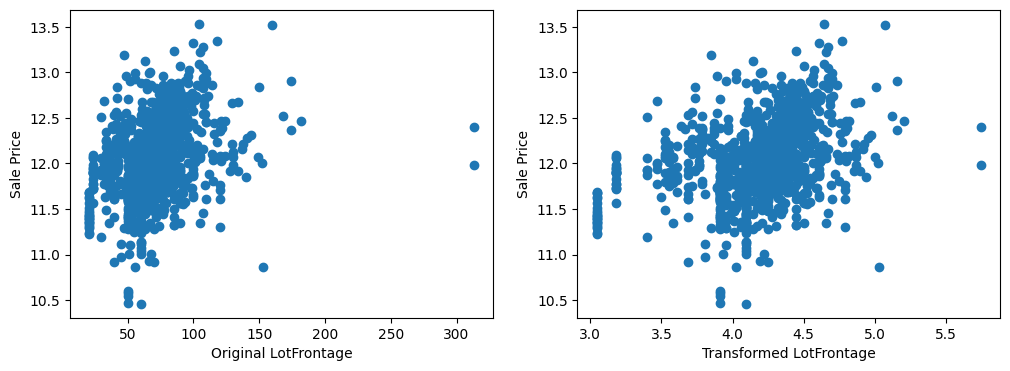

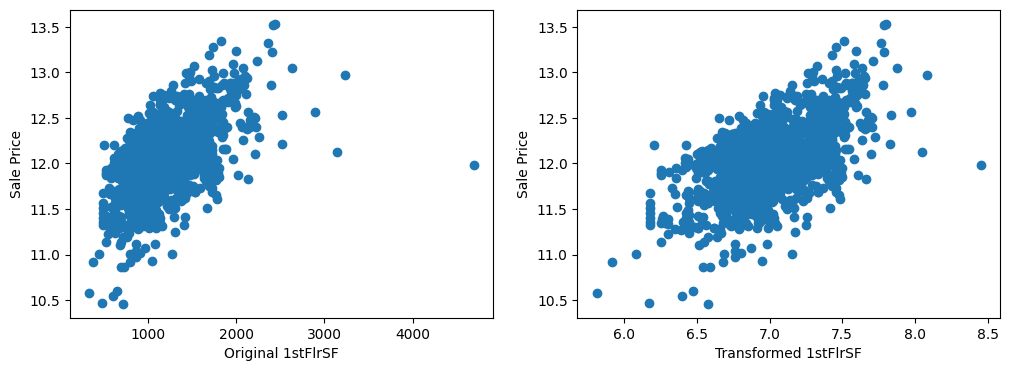

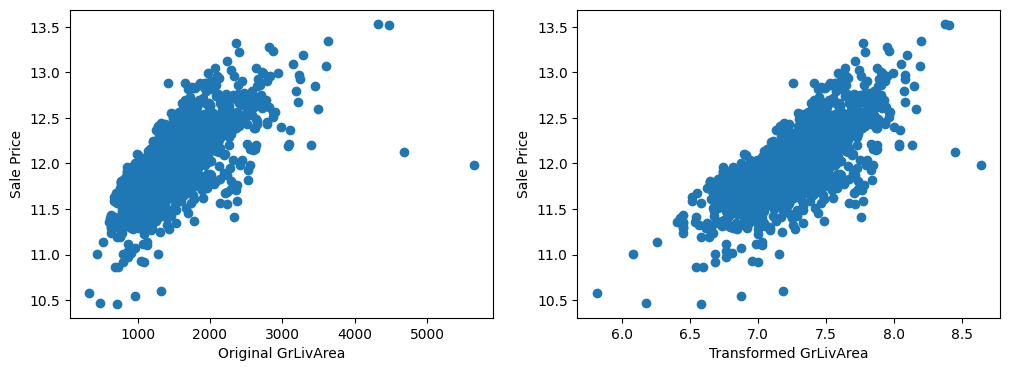

In [46]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(train[var], np.log(train['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

Las variables transformadas tienen una mejor dispersión de los valores, lo que a su vez puede ayudar a hacer mejores predicciones.


### 3.11 Variables sesgadas

In [47]:
# Se transforman las variables sesgadas en variables binarias y se evalua que tán predictivas son.

sesgadas_var

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

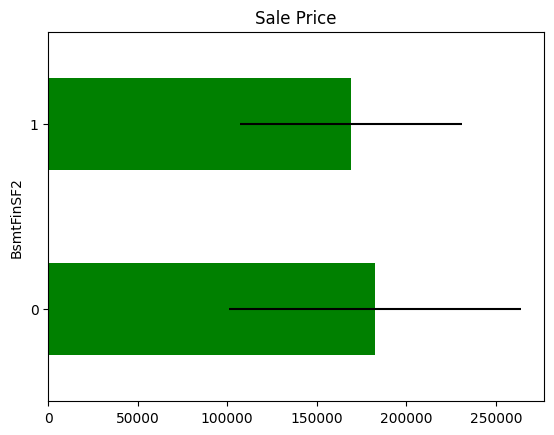

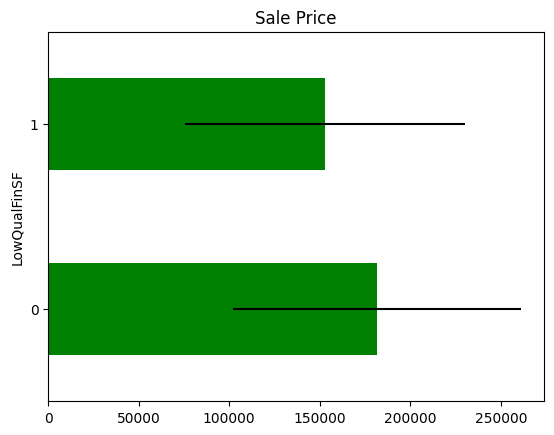

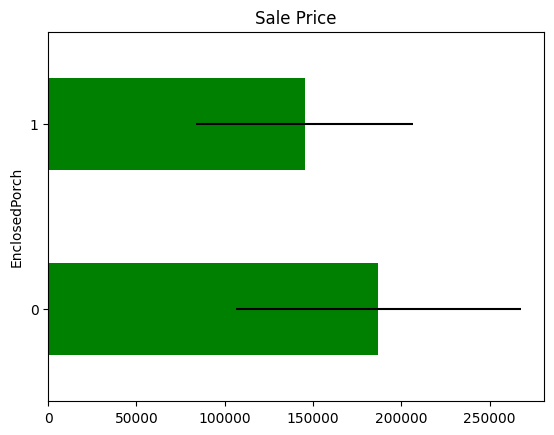

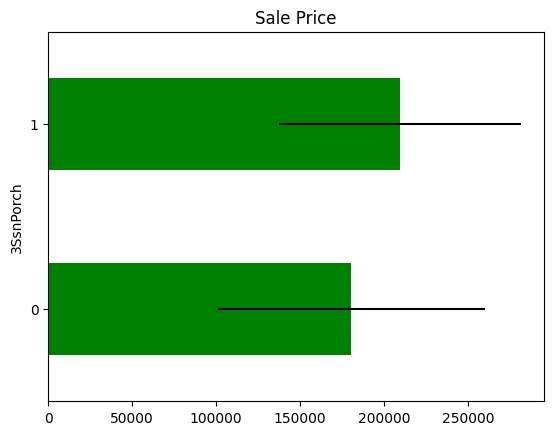

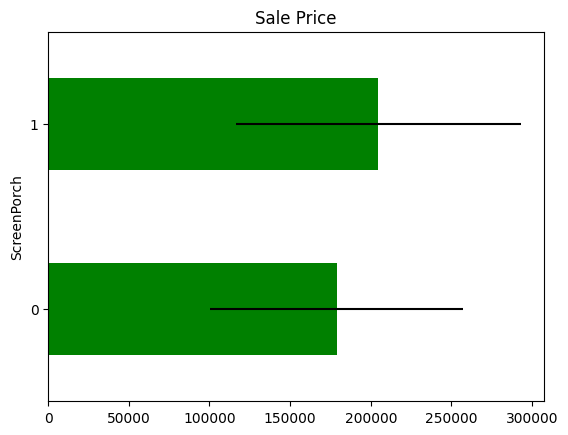

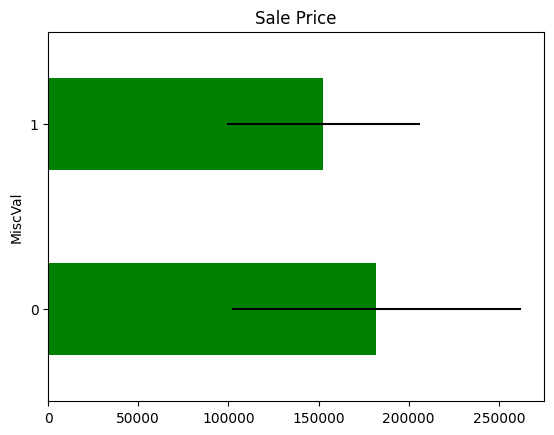

In [48]:
for var in sesgadas_var:
    
    tmp = train.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(train[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

Parece haber una diferencia en el precio de venta en los valores mapeados, pero los intervalos de confianza se superponen, por lo que lo más probable es que esto no sea significativo ni predictivo.

### 3.12 Variables Categóricas

In [49]:
categorical_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [50]:
print('Número de variables categóricas: ', len(categorical_vars))

Número de variables categóricas:  44


In [51]:
train[categorical_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  MSSubClass  
0       WD        Normal          60  
1       WD        Normal          20  
2       WD        Normal          60  
3       WD       Abnorml          70  
4       WD        Normal          60

### 3.12.1 Cantidad de valores únicos por variable

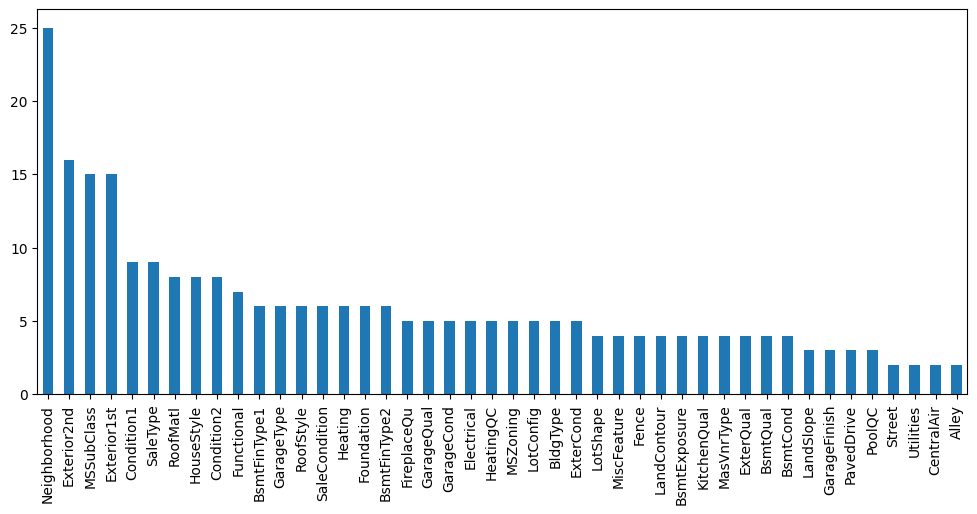

In [52]:
# Se cuentan los valores únicos para cada variable categórica y se grafican en orden descendente

train[categorical_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

Todas las variables categóricas muestran baja cardinalidad, esto significa que tienen pocas etiquetas diferentes. Eso es bueno ya que no necesitaremos abordar la cardinalidad durante la etapa de ingeniería de características.

### 3.12.2 Calidad de las variables 

Hay una serie de variables que hacen referencia a la calidad de algún aspecto de la casa, por ejemplo el garaje, o la cerca, o la cocina. Se reemplazaran estas categorías por números que aumentan con la calidad del lugar o la habitación.

Las asignaciones se pueden obtener del sitio web de Kaggle. Un ejemplo:

- Ex = Excelente
- Dios = Bueno
- TA = Promedio/Típico
- Fa = Justo
- Po = Pobre

In [53]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    train[var] = train[var].map(qual_mappings)

In [54]:
train[qual_vars].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          4          3       4.0       3.0          5            4   
1          3          3       4.0       3.0          5            3   
2          4          3       4.0       3.0          5            4   
3          3          3       3.0       4.0          4            4   
4          4          3       4.0       3.0          5            4   

   FireplaceQu  GarageQual  GarageCond  
0          NaN         3.0         3.0  
1          3.0         3.0         3.0  
2          3.0         3.0         3.0  
3          4.0         3.0         3.0  
4          3.0         3.0         3.0

In [55]:
train[qual_vars].isnull().sum()

ExterQual        0
ExterCond        0
BsmtQual        37
BsmtCond        37
HeatingQC        0
KitchenQual      0
FireplaceQu    690
GarageQual      81
GarageCond      81
dtype: int64

In [56]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

train[var] = train[var].map(exposure_mappings)

In [57]:
train[var].head()

0    1.0
1    4.0
2    2.0
3    1.0
4    3.0
Name: BsmtExposure, dtype: float64

In [58]:
train[var].isnull().sum()

38

In [59]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    train[var] = train[var].map(finish_mappings)

In [61]:
train[finish_vars].head()

BsmtFinType1  BsmtFinType2
0           6.0           1.0
1           5.0           1.0
2           6.0           1.0
3           5.0           1.0
4           6.0           1.0

In [63]:
train[finish_vars].isnull().sum()

BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [64]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

train[var] = train[var].map(garage_mappings)

In [66]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

train[var] = train[var].map(fence_mappings)

In [67]:
# Agrupar todas las variables relacionadas a la calidad

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [68]:
qual_vars

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageFinish',
 'Fence']

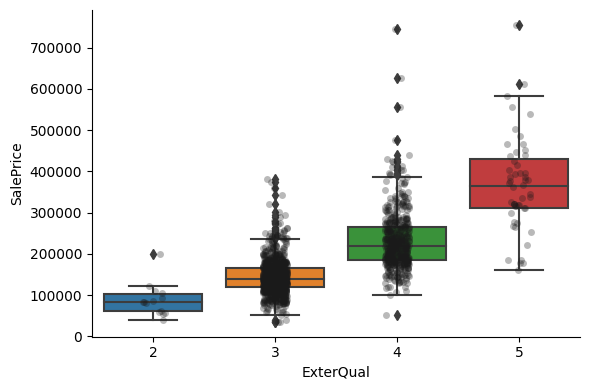

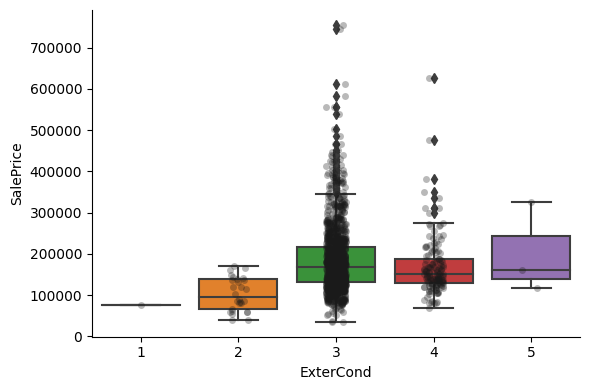

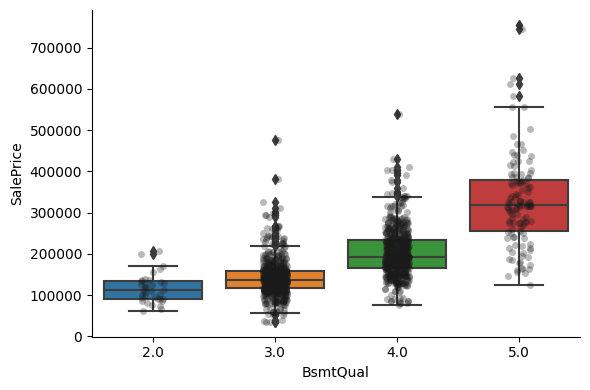

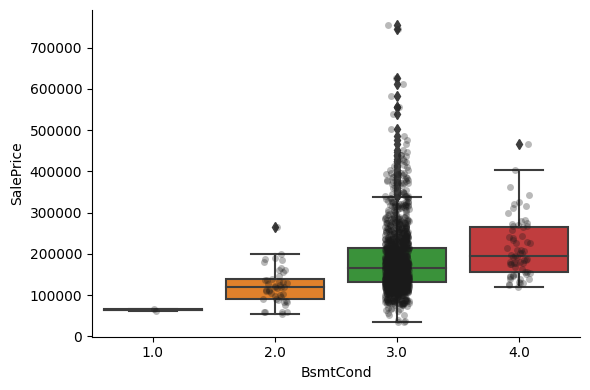

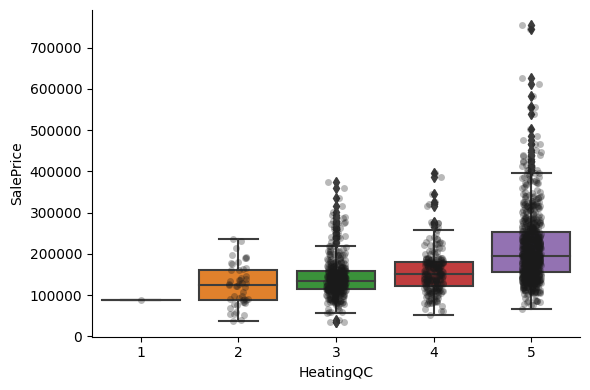

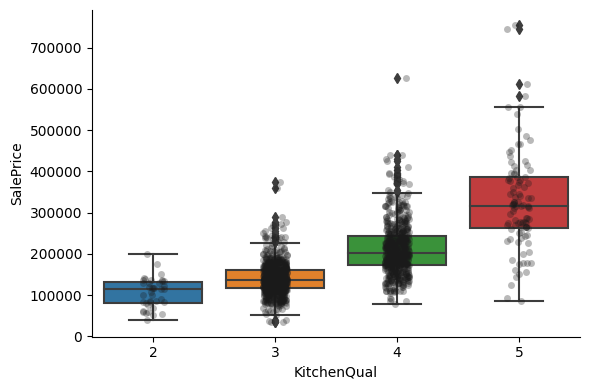

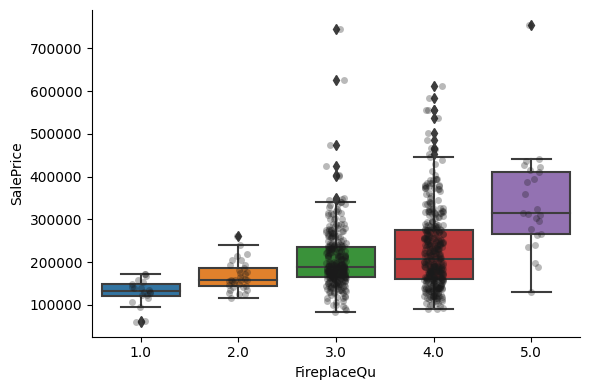

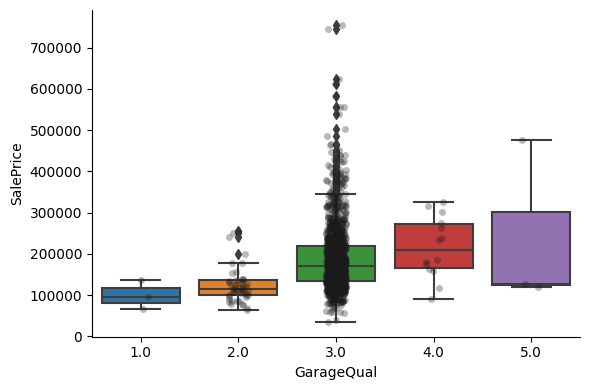

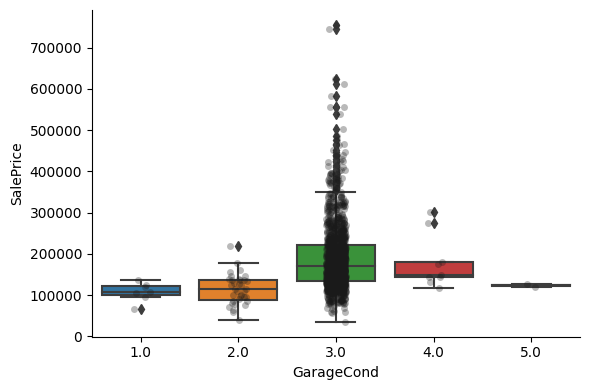

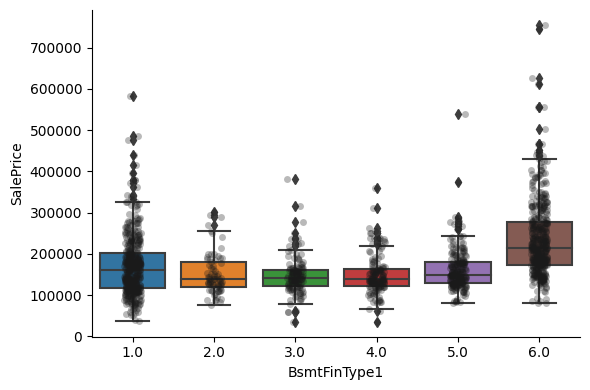

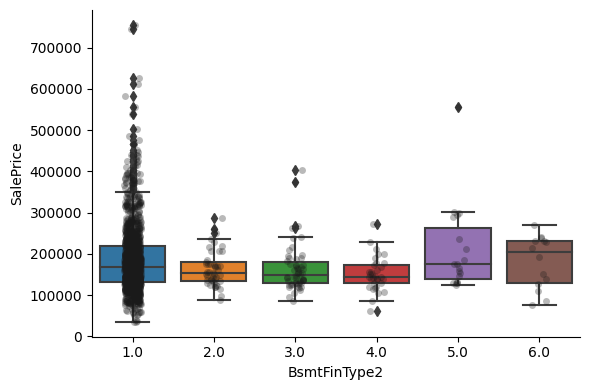

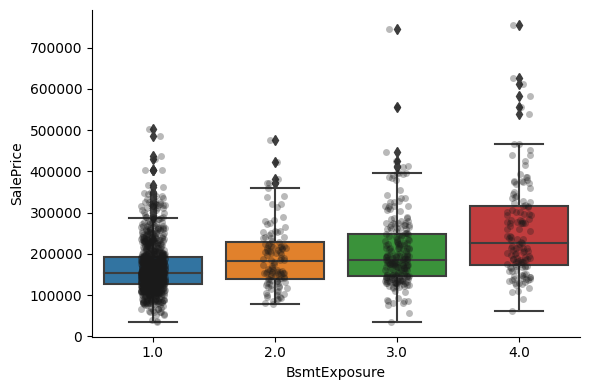

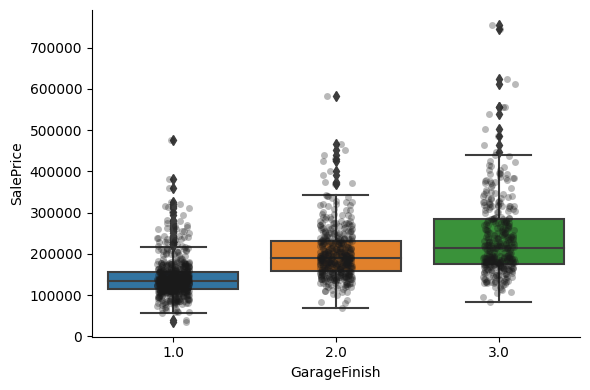

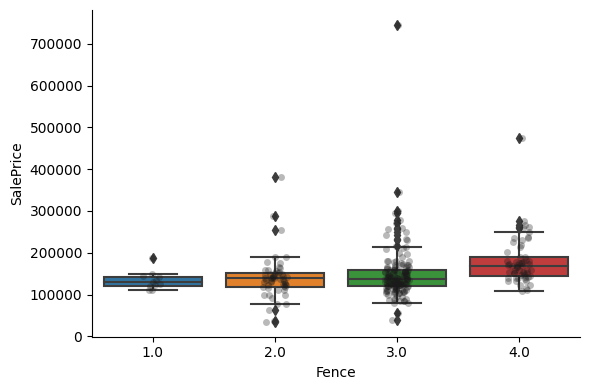

In [71]:
for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=train, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Para la mayoría de los atributos, el aumento del precio de la vivienda con el valor de la variable es bastante claro.

In [72]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in categorical_vars if var not in qual_vars
]

len(cat_others)

30

In [73]:
cat_others

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

### 3.12.3 Etiquetas poco frecuentes

In [74]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]


In [75]:
# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(train, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Algunas de las variables categóricas muestran etiquetas múltiples que están presentes en menos del 1% de las viviendas.

Las etiquetas que están subrepresentadas en el conjunto de datos tienden a provocar un ajuste excesivo de los modelos de aprendizaje automático.

Por eso queremos eliminarlos.

Finalmente, queremos explorar la relación entre las categorías de las distintas variables y el precio de venta de la vivienda:

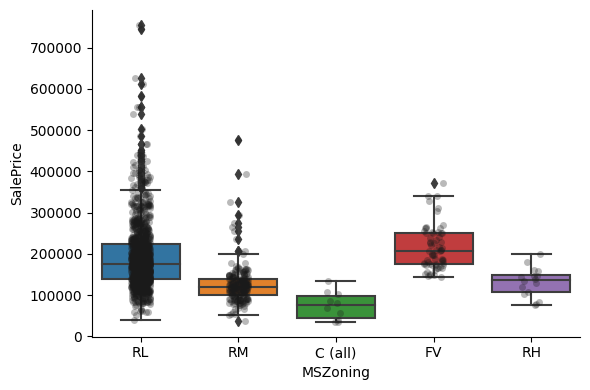

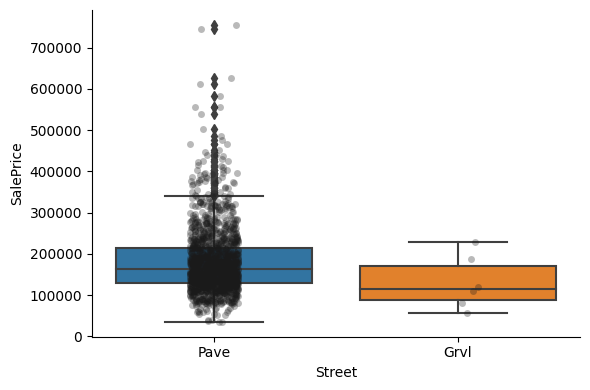

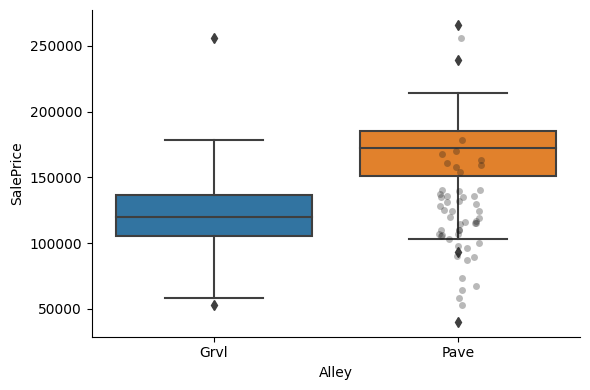

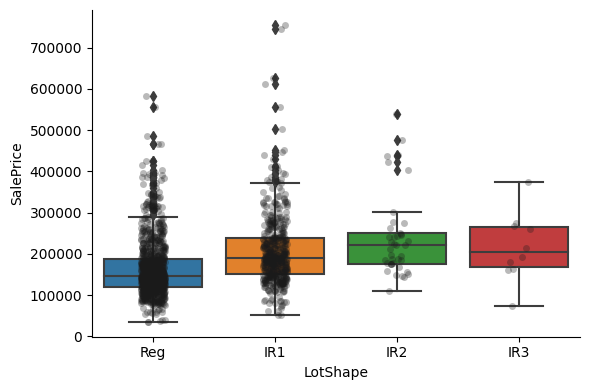

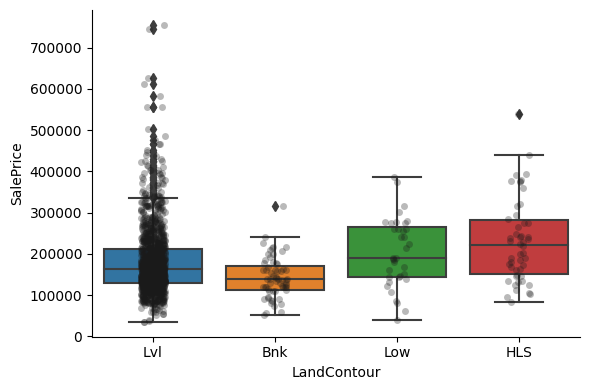

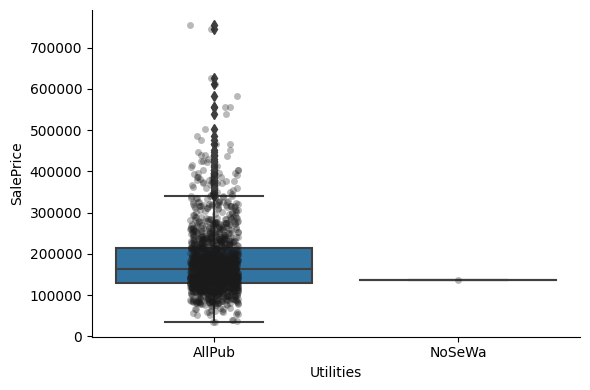

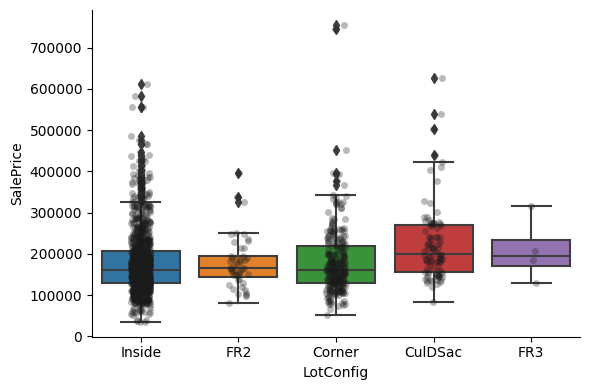

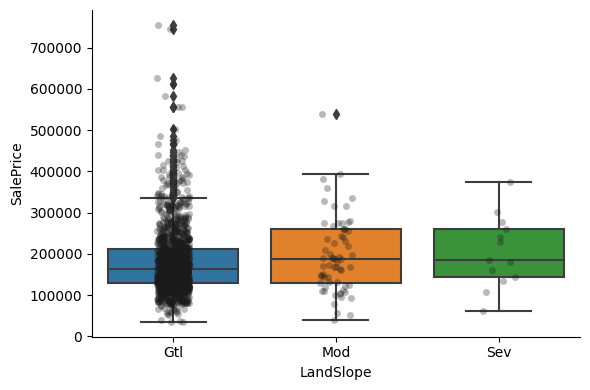

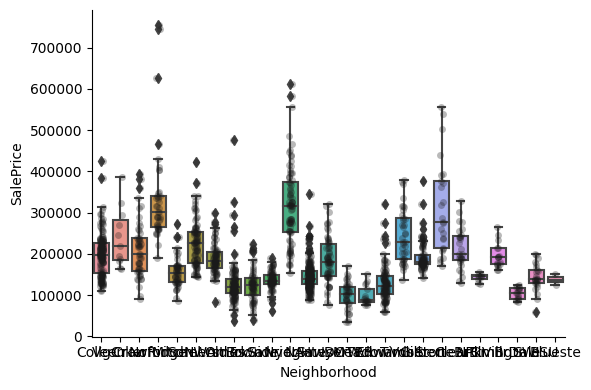

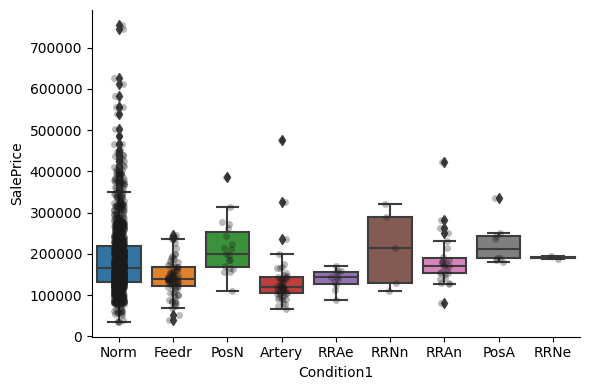

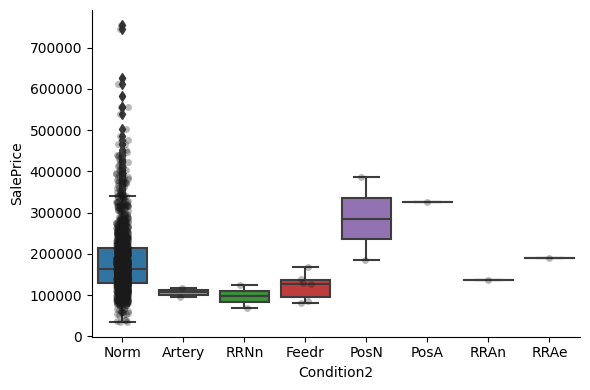

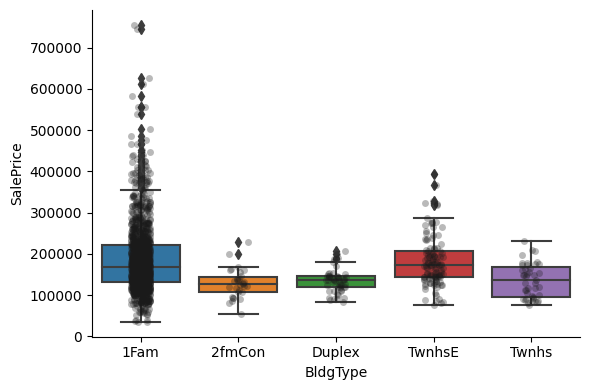

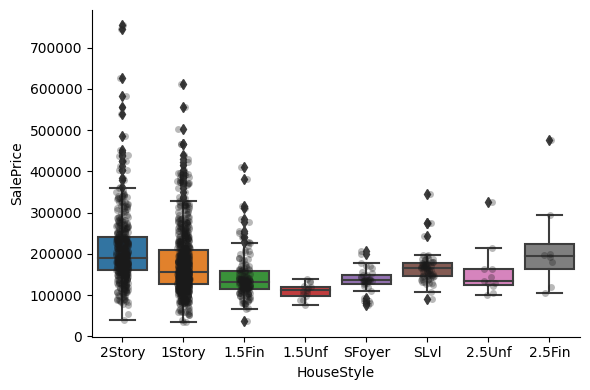

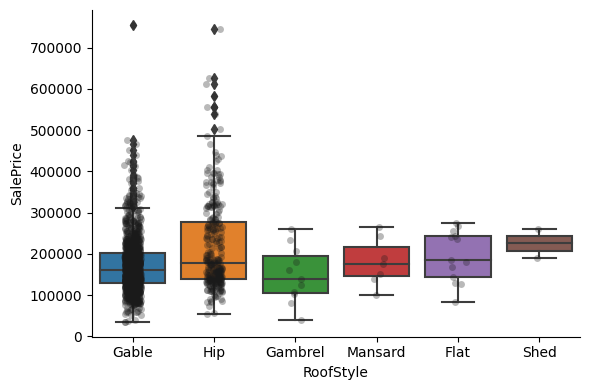

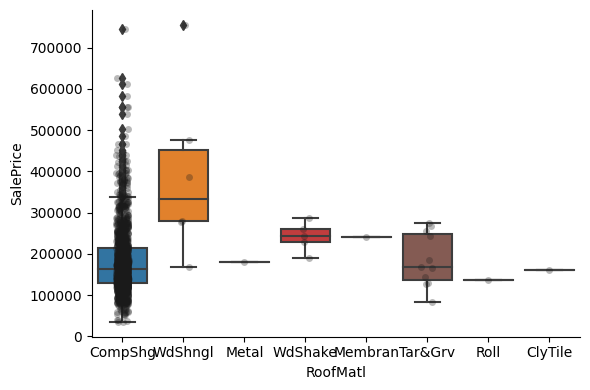

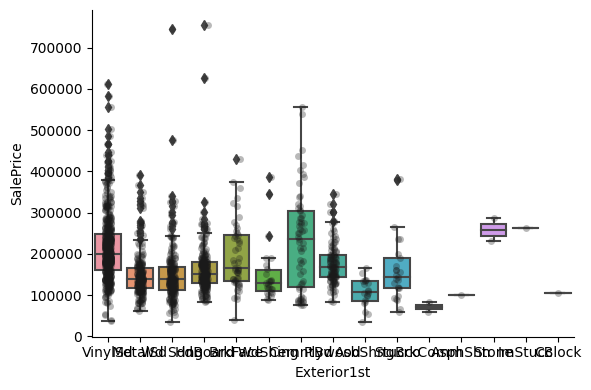

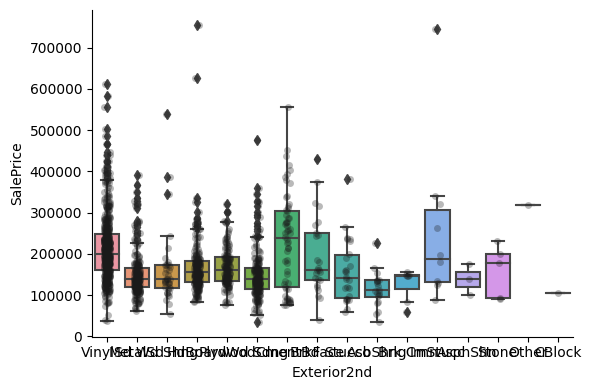

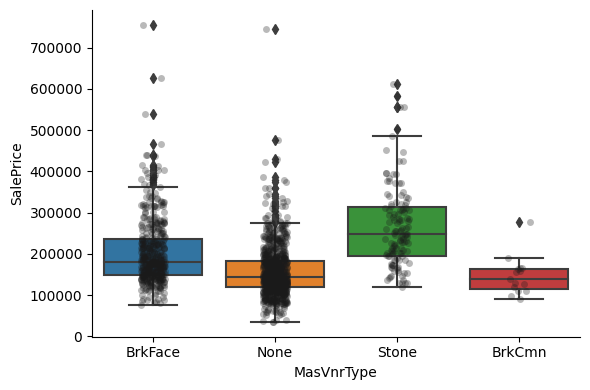

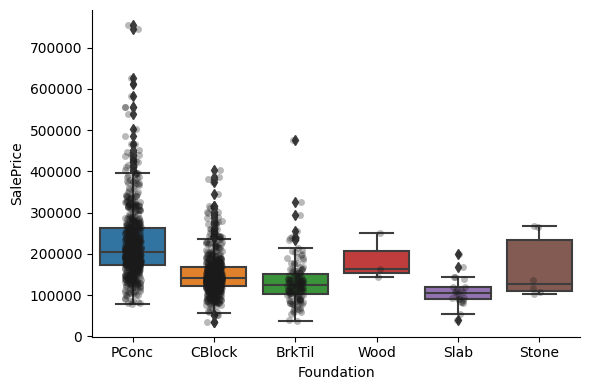

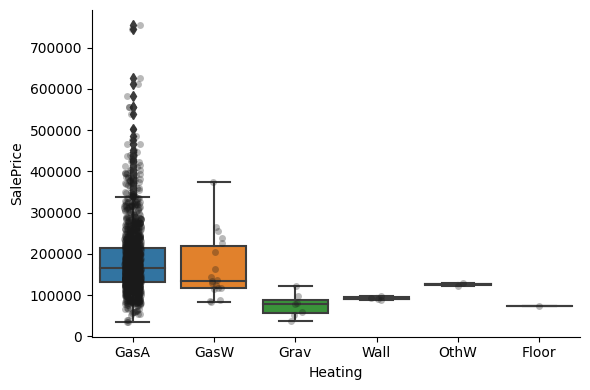

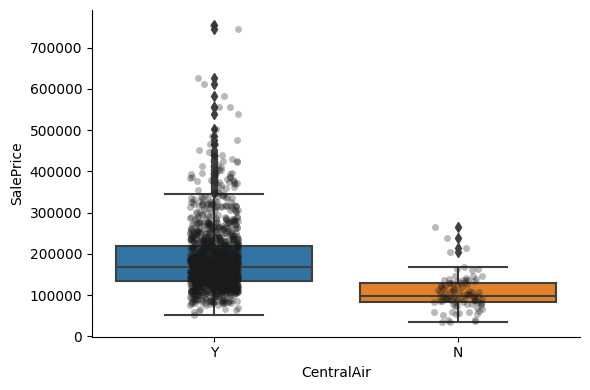

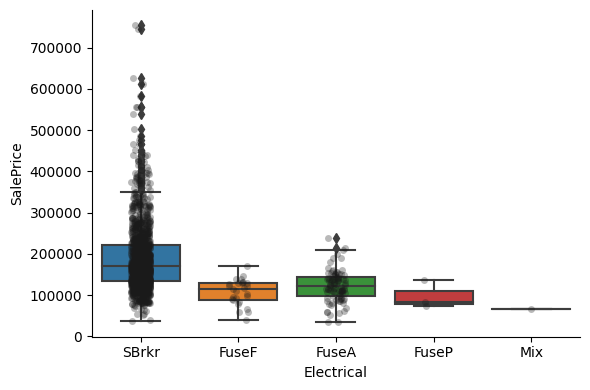

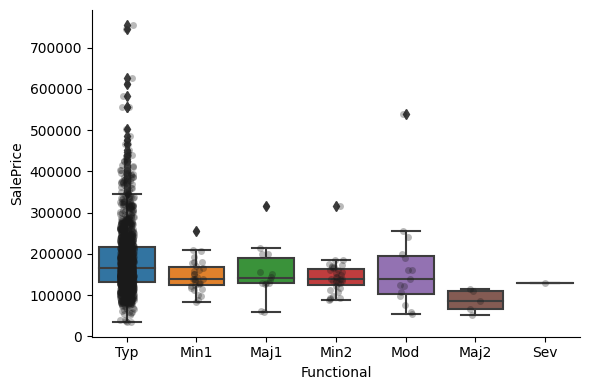

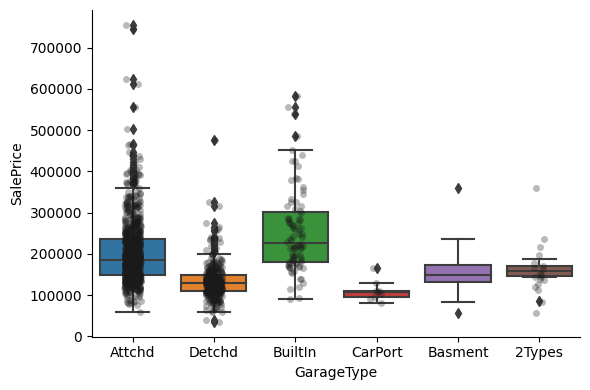

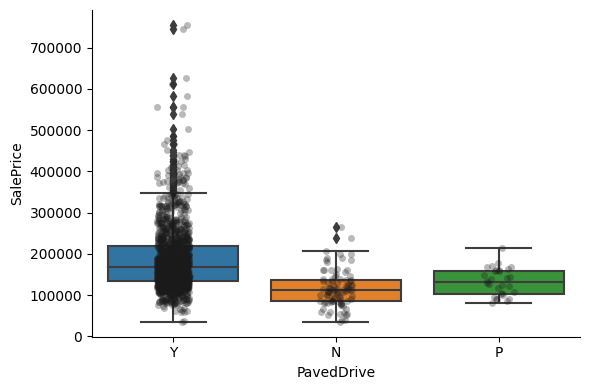

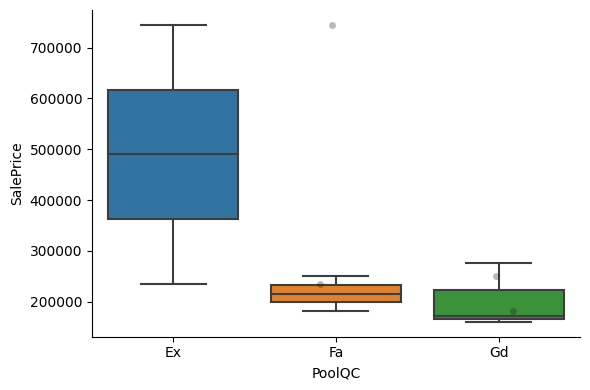

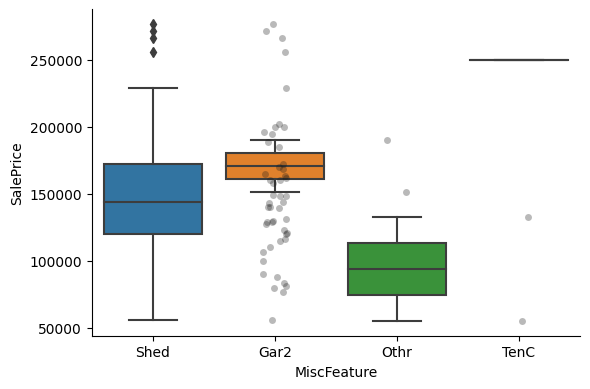

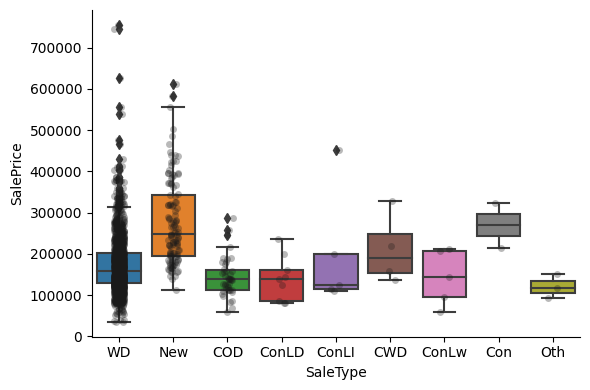

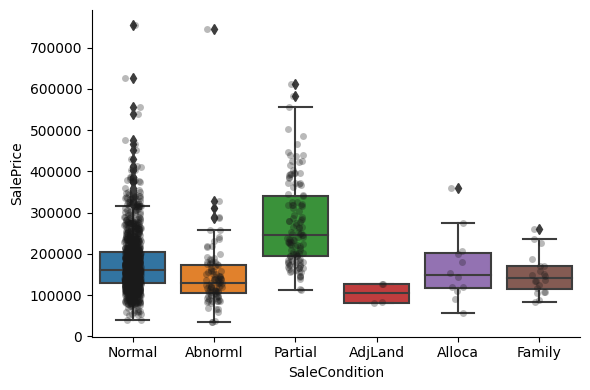

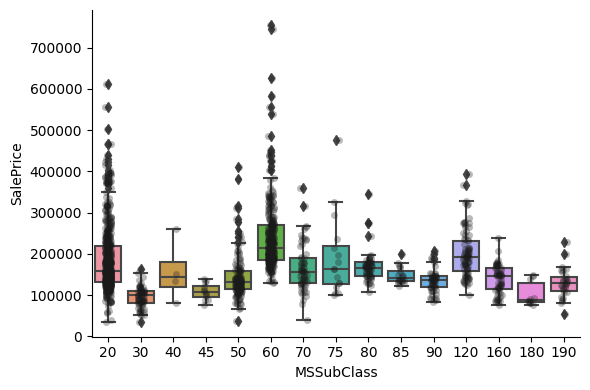

In [77]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=train, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Claramente, las categorías brindan información sobre SalePrice, ya que diferentes categorías muestran diferentes precios medios de venta.